In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import mannwhitneyu, ttest_ind
from sklearn.utils import resample
from google.colab import files
import io

# Upload the file
uploaded = files.upload()

# Read the file into a pandas DataFrame
# Assuming the file is a CSV
filename = list(uploaded.keys())[0]  # Get the filename
df = pd.read_csv(io.BytesIO(uploaded[filename]))


IndexError: list index out of range

In [ ]:
# For checking the velocity and removing channels with no movement based on moseq_df.csv

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
sns.set_style("whitegrid") # Use a visually appealing style

# Calculate baseline using the mean
baseline_mean = np.mean(df['velocity_px_s'])

# Calculate baseline using the median
baseline_median = np.median(df['velocity_px_s'])

# Calculate the threshold (median + 2 standard deviations)
threshold = np.median(df['velocity_px_s']) + 2 * np.std(df['velocity_px_s'])


# Create the plot
sns.lineplot(x=df.index, y='velocity_px_s', data=df, marker='o', linestyle='-', linewidth=2)

# Customize labels and title
plt.xlabel("Time (s)", fontsize=14)
plt.ylabel("Velocity (px/s)", fontsize=14)
plt.title("Velocity over Time", fontsize=16)

# Divide the x-axis tick labels by 60
xticks = plt.xticks()[0] # Get the current x-axis tick locations
plt.xticks(xticks, (xticks / 60).astype(int)) # Set new tick labels divided by 60

# Improve tick marks and grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add baseline and threshold lines to the plot
plt.axhline(y=baseline_mean, color='r', linestyle='--', label='Mean Baseline')
plt.axhline(y=baseline_median, color='g', linestyle='--', label='Median Baseline')
plt.axhline(y=threshold, color='b', linestyle='-', label='Threshold') # 'b' for blue color, '-' for solid line


# Add a legend if needed
plt.legend(fontsize=12)

# Show the plot
plt.show()


NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
# prompt: check how many unique strings in 'name' column of df

print(df['name'].nunique())


6


In [ ]:
## Chunking based on channel name

import pandas as pd
import numpy as np

df_config_keep1 = pd.DataFrame(columns=['Config Number', 'Keep'])

# Get unique names
unique_names = df['name'].unique()

# Calculate the threshold (median + 2 standard deviations) for the entire 'velocity_px_s' column
threshold = np.median(df['velocity_px_s']) + 2 * np.std(df['velocity_px_s'])

# Iterate through unique names
for i, name in enumerate(unique_names):
    # Get the chunk for the current name
    chunk = df[df['name'] == name]

    # Check if any value in 'velocity_px_s' surpasses the threshold
    if any(chunk['velocity_px_s'] > threshold):
        keep_value = 1
    else:
        keep_value = 0

  # Append to df_config_keep1, including the 'name'
    df_config_keep1 = pd.concat([df_config_keep1, pd.DataFrame({'Config Number': [i], 'Keep': [keep_value], 'Name': [name]})], ignore_index=True)

print(df_config_keep1)

  Config Number Keep                                               Name
0             0    1  MATLAB Trial 3 BP Column 4-1723842482DLC_resne...
1             1    1  MATLAB Trial 3 BP Column 5-1723842642DLC_resne...
2             2    1  MATLAB Trial 3 TL Column 4-1723842318DLC_resne...
3             3    1  MATLAB Trial 3 TL Column 5-1723842597DLC_resne...
4             4    1  MATLAB Trial 3 TT Column 4-1723841908DLC_resne...
5             5    1  MATLAB Trial 3 TT Column 5-1723842540DLC_resne...


In [ ]:
print(len(df))

77335


In [ ]:
df_config_keep2 = pd.DataFrame(columns=['Config Number', 'Keep'])

chunk_size = 600

# Calculate the threshold (median + 2 standard deviations) for the entire 'velocity_px_s' column
threshold = np.median(df['velocity_px_s']) + 2 * np.std(df['velocity_px_s'])

for i in range(0, len(df), chunk_size):
    chunk = df[i:i + chunk_size]  # Chunk based on frame_index (assuming consecutive)

    if any(chunk['velocity_px_s'] > threshold):
    #if np.sum(chunk['velocity_px_s'] > threshold) > len(chunk) / 2:
        keep_value = 1
    else:
        keep_value = 0

    new_row = pd.DataFrame({'Config Number': [i // chunk_size], 'Keep': [keep_value]})
    df_config_keep2 = pd.concat([df_config_keep2, new_row], ignore_index=True)

print(df_config_keep2)

# Print the number of rows where Keep is 0 and 1
keep_0_count = df_config_keep2[df_config_keep2['Keep'] == 0].shape[0]
keep_1_count = df_config_keep2[df_config_keep2['Keep'] == 1].shape[0]

print(f"Number of rows where Keep is 0: {keep_0_count}")
print(f"Number of rows where Keep is 1: {keep_1_count}")

    Config Number Keep
0               0    1
1               1    1
2               2    1
3               3    1
4               4    1
..            ...  ...
124           124    1
125           125    1
126           126    0
127           127    0
128           128    0

[129 rows x 2 columns]
Number of rows where Keep is 0: 19
Number of rows where Keep is 1: 110


In [ ]:
# Save the DataFrame to a CSV file
df_config_keep2.to_csv('df_b12f_keep.csv', index=False)

from google.colab import files
files.download('df_b12f_keep.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: After print(df.groupby('name').size()), divide the size by 60 to see how many seconds the video is

print(df.groupby('name').size() / 60 / 60)


name
TIS Sweep 1_100     5.774722
TIS Sweep 1_99     16.453889
TIS Sweep 2_100     7.318056
TIS Sweep 2_99     17.149444
dtype: float64


In [ ]:
## FOR BATCH 12 f-g (TIS)

import pandas as pd
import numpy as np

# Create a list of Configuration values from 0 to 128
configurations = list(range(129))

# Configurations to exclude (Keep = 1 for these)
#exclude_configs = [0, 1, 8, 16, 17, 24, 32, 33, 40, 48, 49, 56, 57, 64, 72, 80, 88, 112, 120] # For 12f
exclude_configs = [1, 5, 6, 11, 14, 22, 37, 64, 72, 79, 94, 116]  # For 12g

# Create a list of Keep values (0 or 1)
keep_values = [1 if config in exclude_configs else 0 for config in configurations]

# Create the DataFrame
df_b12f = pd.DataFrame({'Configuration': configurations, 'Keep': keep_values})

# Print the DataFrame
print(df_b12f)

# Save the DataFrame to a CSV file
df_b12f.to_csv('df_b12f_keep.csv', index=False)

from google.colab import files
files.download('df_b12f_keep.csv')

     Configuration  Keep
0                0     0
1                1     1
2                2     0
3                3     0
4                4     0
..             ...   ...
124            124     0
125            125     0
126            126     0
127            127     0
128            128     0

[129 rows x 2 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## For BATCH 10

import pandas as pd
df_b10_TIS1 = pd.concat([df[df['name'] == 'TIS Sweep 1_99'], df[df['name'] == 'TIS Sweep 1_100']])
df_b10_TIS2 = pd.concat([df[df['name'] == 'TIS Sweep 2_99'], df[df['name'] == 'TIS Sweep 2_100']])

print(len(df_b10_TIS1))
print(len(df_b10_TIS2))


In [ ]:
## Chunk based on number of frames (600)
import pandas as pd
import numpy as np

df_config_keep2 = pd.DataFrame(columns=['Config Number', 'Keep'])

chunk_size = 600
for i in range(0, len(df_b10_TIS2), chunk_size):
    chunk = df_b10_TIS2[i:i + chunk_size]
    if 1 in chunk['keep'].values:
        keep_value = 1
    else:
        keep_value = 0  # If no 1 is found, set keep_value to 0

    new_row = pd.DataFrame({'Config Number': [i // chunk_size], 'Keep': [keep_value]})
    df_config_keep2 = pd.concat([df_config_keep2, new_row], ignore_index=True)

print (df_config_keep2)


In [ ]:
df_config_keep2.to_csv('df_b10_TIS2_keep.csv', index=False)

from google.colab import files
files.download('df_b10_TIS2_keep.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Double check: tell me if print(df[21600:21700]) has a 0 in the column 'keep'

if 0 in df_b10_TIS1[21600:21700]['keep'].values:
  print("The column 'keep' in the specified range contains a 0.")
else:
  print("The column 'keep' in the specified range does not contain a 0.")


The column 'keep' in the specified range contains a 0.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import mannwhitneyu, ttest_ind
from sklearn.utils import resample
from google.colab import files
import io

# Upload the file
uploaded = files.upload()

# Read the file into a pandas DataFrame
# Assuming the file is a CSV
filename = list(uploaded.keys())[0]  # Get the filename
df = pd.read_csv(io.BytesIO(uploaded[filename]))

In [ ]:
## FOR COMBINED ANLYSIS OF ALL BATCHES: View the dataframe
print(df)

# Count the number of items in each column and save as variables
column_counts = df.count()

# Example of accessing the counts for specific columns
if 'column1_name' in column_counts:
  column1_count = column_counts['column1_name']
if 'column2_name' in column_counts:
  column2_count = column_counts['column2_name']

# Print the counts (optional)
column_counts


     Biphasic       TIS
0    0.970000  1.000000
1    0.980000  1.000000
2    0.521739  1.000000
3    0.524107  0.890000
4    0.506372  0.860000
..        ...       ...
290       NaN  0.033365
291       NaN  0.033365
292       NaN  0.033365
293       NaN  0.033365
294       NaN  0.033365

[295 rows x 2 columns]


,0
Biphasic,266
TIS,295


In [ ]:
# Separate data for each group
biphasic_data = df['Biphasic']
tis_data = df['TIS']

# Drop NA values
biphasic_data = biphasic_data.dropna()
tis_data = tis_data.dropna()

print("Biphasic Data (NA values dropped):")
print(biphasic_data)
print("\nTIS Data (NA values dropped):")
print(tis_data)

Biphasic Data (NA values dropped):
0      0.970000
1      0.980000
2      0.521739
3      0.524107
4      0.506372
         ...   
261    0.051604
262    0.060724
263    0.085678
264    0.085678
265    0.062116
Name: Biphasic, Length: 266, dtype: float64

TIS Data (NA values dropped):
0      1.000000
1      1.000000
2      1.000000
3      0.890000
4      0.860000
         ...   
290    0.033365
291    0.033365
292    0.033365
293    0.033365
294    0.033365
Name: TIS, Length: 295, dtype: float64


In [ ]:
# Non-parametric test (Mann-Whitney U test)
u_statistic, p_value = mannwhitneyu(biphasic_data, tis_data)
print(f"Non-bootstrapped Mann-Whitney U test p-value: {p_value}")

# Welch's t-test
t_statistic, p_value = ttest_ind(biphasic_data, tis_data, equal_var=False)
print(f"Non-bootstrapped Welch’s t-test p-value: {p_value}")

Non-bootstrapped Mann-Whitney U test p-value: 2.790490154638799e-09
Non-bootstrapped Welch’s t-test p-value: 1.1333542305170595e-07


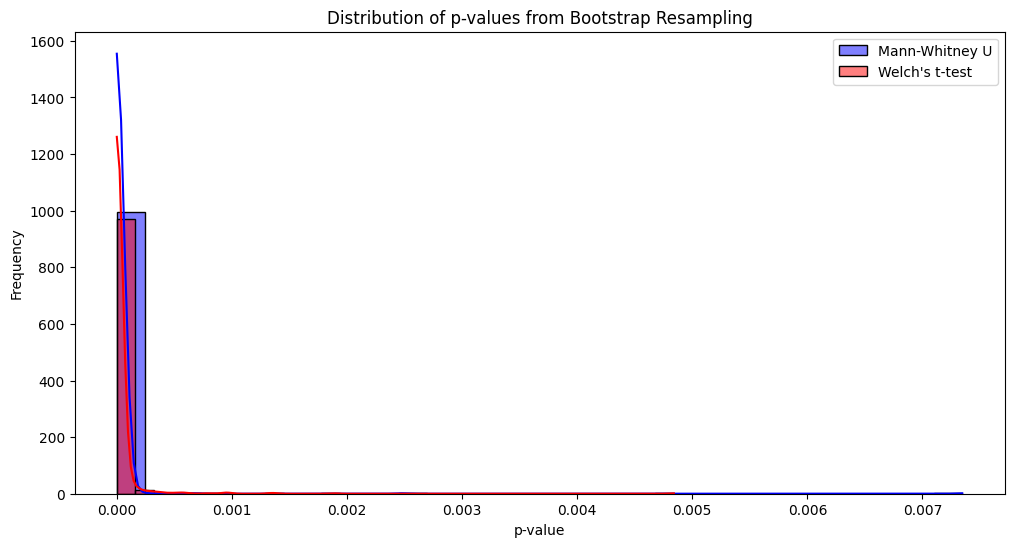

Mean p-value (Mann-Whitney U) after bootstrapping: 1.314509684157737e-05
Mean p-value (Welch's t-test) after bootstrapping: 2.5085045358784635e-05


In [ ]:
import numpy as np
from sklearn.utils import resample

# --- BOOTSTRAP RESAMPLING ---
n_iterations = 1000
boot_p_u = []  # Store p-values from Mann-Whitney U test
boot_p_ttest = []  # Store p-values from Welch's t-test

for i in range(n_iterations):
    # Resample data for each group with replacement
    boot_biphasic = resample(biphasic_data, replace=True, random_state=i)
    boot_tis = resample(tis_data, replace=True, random_state=i)

    # Calculate and store p-values for each test
    _, p_u = mannwhitneyu(boot_biphasic, boot_tis)
    boot_p_u.append(p_u)

    _, p_ttest = ttest_ind(boot_biphasic, boot_tis, equal_var=False)
    boot_p_ttest.append(p_ttest)

# Visualize p-value distributions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(boot_p_u, kde=True, color="blue", label="Mann-Whitney U", bins=30)
sns.histplot(boot_p_ttest, kde=True, color="red", label="Welch's t-test", bins=30)
plt.title("Distribution of p-values from Bootstrap Resampling")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Print some summary statistics for the p-value distributions
print(f"Mean p-value (Mann-Whitney U) after bootstrapping: {np.mean(boot_p_u)}")
print(f"Mean p-value (Welch's t-test) after bootstrapping: {np.mean(boot_p_ttest)}")

Mann-Whitney U test p-value: 0.0
Welch’s t-test p-value: 0.0


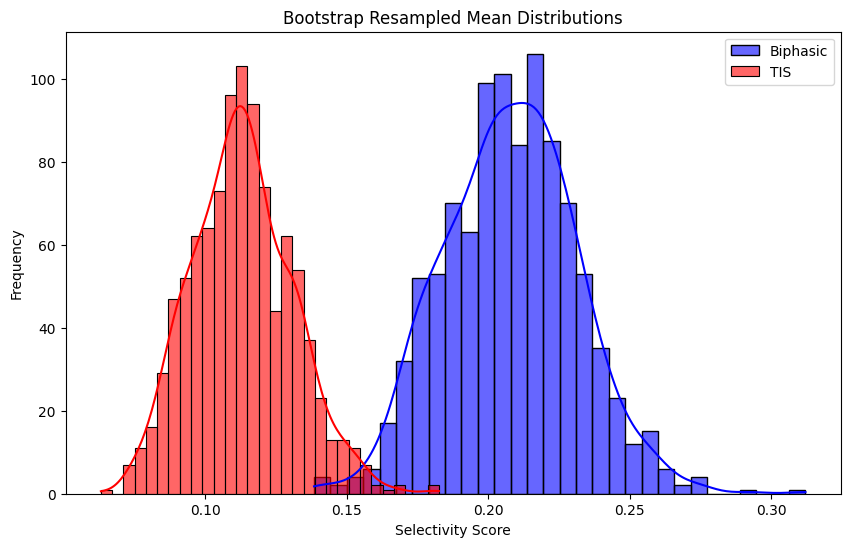

In [ ]:
# --- BOOTSTRAP RESAMPLING ---
n_iterations = 1000
boot_means_biphasic = []
boot_means_tis = []

for i in range(n_iterations):
    boot_sample_biphasic = resample(biphasic_data, n_samples=100, replace=True, random_state=i)
    boot_sample_tis = resample(tis_data, n_samples=100,replace=True, random_state=i)

    boot_means_biphasic.append(np.mean(boot_sample_biphasic))
    boot_means_tis.append(np.mean(boot_sample_tis))

boot_means_biphasic = np.array(boot_means_biphasic)
boot_means_tis = np.array(boot_means_tis)

# Statistical Tests
u_stat, p_u = mannwhitneyu(boot_means_biphasic, boot_means_tis)
t_stat, p_ttest = ttest_ind(boot_means_biphasic, boot_means_tis, equal_var=False)

print(f"Mann-Whitney U test p-value: {p_u}")
print(f"Welch’s t-test p-value: {p_ttest}")

plt.figure(figsize=(10, 6))
sns.histplot(boot_means_biphasic, kde=True, color="blue", label="Biphasic", bins=30, alpha=0.6)
sns.histplot(boot_means_tis, kde=True, color="red", label="TIS", bins=30, alpha=0.6)
plt.title("Bootstrap Resampled Mean Distributions")
plt.xlabel("Selectivity Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
# --- 3. Effect Size (Cohen's d) ---
def cohens_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1)**2 + (ny-1)*np.std(y, ddof=1)**2) / dof)

effect_size = cohens_d(biphasic_data, tis_data)  # Using original data for effect size
print(f"Cohen's d effect size: {effect_size}")

Cohen's d effect size: -0.6265281993252


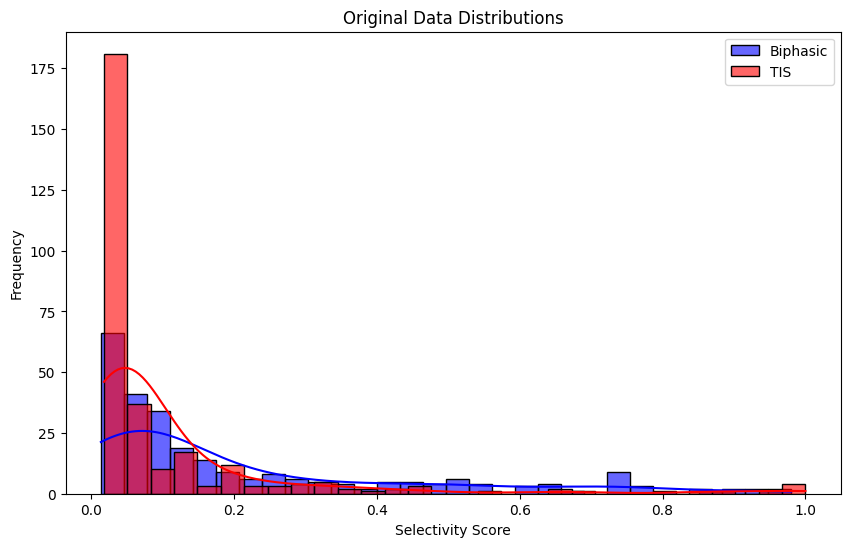

<ipython-input-7-65a6a27cd5b9>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Biphasic", "TIS"])  # Set x-axis labelsplt.title("Original Data Box Plots")


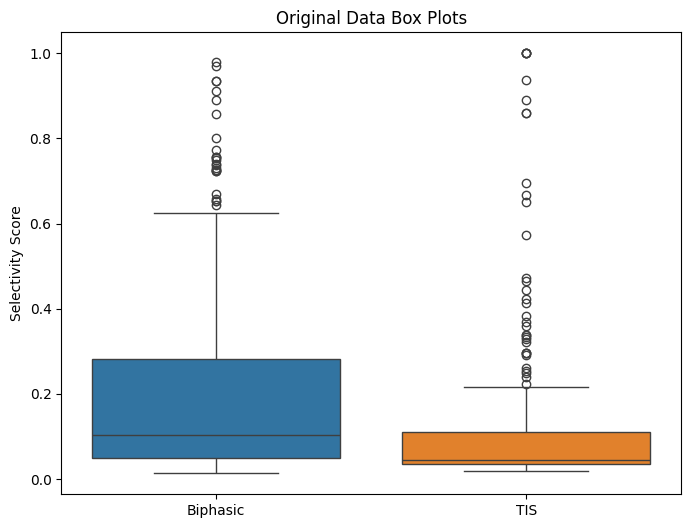

<ipython-input-7-65a6a27cd5b9>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Stimulation Type', y='Selectivity', data=df_long,


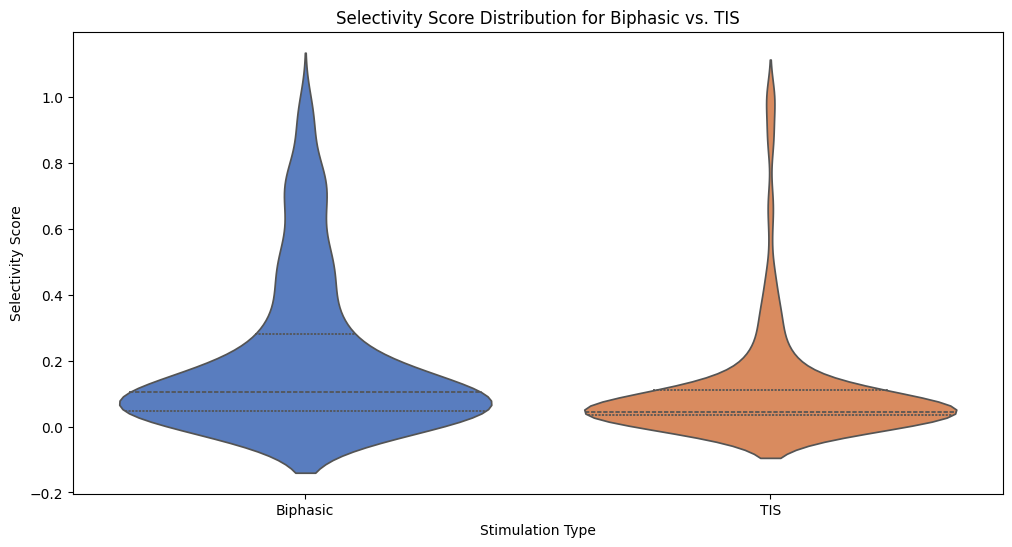

In [ ]:
# --- 4. Original Data Visualization ---
plt.figure(figsize=(10, 6))
sns.histplot(biphasic_data, kde=True, color="blue", label="Biphasic", bins=30, alpha=0.6)
sns.histplot(tis_data, kde=True, color="red", label="TIS", bins=30, alpha=0.6)
plt.title("Original Data Distributions")
plt.xlabel("Selectivity Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# You can also use box plots for original data visualization:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=[biphasic_data, tis_data])
ax.set_xticklabels(["Biphasic", "TIS"])  # Set x-axis labelsplt.title("Original Data Box Plots")
plt.title("Original Data Box Plots")
plt.ylabel("Selectivity Score")
plt.show()

# Reshape the data into long format
df_long = pd.melt(df, value_vars=['Biphasic', 'TIS'],
                  var_name='Stimulation Type', value_name='Selectivity')

# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Stimulation Type', y='Selectivity', data=df_long,
               inner="quartile", palette="muted")
plt.title("Selectivity Score Distribution for Biphasic vs. TIS")
plt.xlabel("Stimulation Type")
plt.ylabel("Selectivity Score")
plt.show()

In [ ]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# from scipy.stats import entropy, permutation_test
# from scipy.spatial.distance import jensenshannon, kl_div

# # Load Data (Assume it's formatted with Selectivity, Condition, Animal_ID, Electrode_Location)
# # df = pd.read_csv('your_data.csv')

# # Normalize Syllable Counts
# def normalize_syllable_counts(syllable_counts):
#     return (syllable_counts - np.mean(syllable_counts)) / np.std(syllable_counts)

# # Compute Jensen-Shannon Divergence for Distribution Similarity
# def compute_distribution_similarity(dist1, dist2):
#     return jensenshannon(dist1, dist2)

# # Bootstrap Resampling
# def bootstrap_resample(data, n=235, num_bootstraps=1000):
#     np.random.seed(42)
#     return [np.random.choice(data, size=n, replace=True) for _ in range(num_bootstraps)]

# # Linear Mixed-Effects Model (LMM)
# def run_lmm(df):
#     model = smf.mixedlm("Selectivity ~ Condition", df, groups=df["Animal_ID"], re_formula="~Electrode_Location")
#     result = model.fit()
#     print(result.summary())

# # Permutation Testing
# def permutation_test_selectivity(group1, group2, num_permutations=10000):
#     def statistic(x, y):
#         return np.mean(x) - np.mean(y)
#     result = permutation_test((group1, group2), statistic, n_resamples=num_permutations, alternative="two-sided")
#     return result.pvalue

# # Compute Shannon Entropy
# def compute_syllable_entropy(syllable_counts):
#     probabilities = syllable_counts / np.sum(syllable_counts)
#     return entropy(probabilities)

# # Compute HMM Transition Matrix Similarity
# def compute_transition_matrix_similarity(matrix1, matrix2):
#     return np.sum(kl_div(matrix1.flatten(), matrix2.flatten()))

# # Visualization Functions
# def plot_selectivity_distribution(df):
#     sns.boxplot(x="Condition", y="Selectivity", data=df)
#     plt.title("Comparison of Selectivity Between TIS and Biphasic")
#     plt.show()

# def plot_kde_syllable_distribution(df):
#     sns.kdeplot(df[df['Condition']=='TIS']['Selectivity'], label='TIS', fill=True)
#     sns.kdeplot(df[df['Condition']=='Biphasic']['Selectivity'], label='Biphasic', fill=True)
#     plt.title("KDE of Selectivity Scores")
#     plt.legend()
#     plt.show()

# # Execute Analysis (Placeholder Data Assumed)
# if __name__ == "__main__":
#     # Placeholder: Replace with real dataset
#     df = pd.DataFrame({
#         "Selectivity": np.random.randn(931),
#         "Condition": ["TIS"]*696 + ["Biphasic"]*235,
#         "Animal_ID": np.random.randint(1, 10, 931),
#         "Electrode_Location": np.random.randint(1, 5, 931)
#     })

#     run_lmm(df)
#     plot_selectivity_distribution(df)
#     plot_kde_syllable_distribution(df)


In [ ]:
## Load CSV for Long Format (LMM)
#df = pd.read_csv("KPMS SE LMM.csv")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import mannwhitneyu, ttest_ind
from sklearn.utils import resample
from google.colab import files
import io

# Upload the file
uploaded = files.upload()

# Read the file into a pandas DataFrame
# Assuming the file is a CSV
filename = list(uploaded.keys())[0]  # Get the filename
long_df = pd.read_csv(io.BytesIO(uploaded[filename]))

Saving KPMS SE LMM test.csv to KPMS SE LMM test (3).csv


In [ ]:
# Display the long_df DataFrame
display(long_df)

long_df_reassigned = long_df.copy()

# Assign numeric values to Stimulation Type
stimulation_mapping = {"Biphasic": 0, "TIS": 1}
long_df_reassigned["Stimulation Type Num"] = long_df_reassigned["Stimulation Type"].map(stimulation_mapping)
print("Stimulation Type Mapping:", stimulation_mapping)

# Assign numeric values to Animal ID
animal_mapping = {name: i+1 for i, name in enumerate(long_df_reassigned["Animal ID"].unique())}
long_df_reassigned["Animal ID Num"] = long_df_reassigned["Animal ID"].map(animal_mapping)
print("Animal ID Mapping:", animal_mapping)

# Assign numeric values to Configuration ID
config_id_mapping = {name: i+1 for i, name in enumerate(long_df_reassigned["Configuration ID"].unique())}
long_df_reassigned["Configuration ID Num"] = long_df_reassigned["Configuration ID"].map(config_id_mapping)
print("Configuration ID Mapping:", config_id_mapping)

# Assign numeric values to Configuration Type
config_type_mapping = {"2-ch": 2, "4-ch": 4, "3-ch TL": 3, "3-ch TT": 3}
long_df_reassigned["Configuration Type Num"] = long_df_reassigned["Configuration Type"].map(config_type_mapping)
print("Configuration Type Mapping:", config_type_mapping)

# Print number of unique values
print("Number of unique Animal IDs:", long_df_reassigned["Animal ID"].nunique())
print("Number of unique Configuration IDs:", long_df_reassigned["Configuration ID"].nunique())
print("Number of unique Configuration Types:", long_df_reassigned["Configuration Type"].nunique())

# Filter for Biphasic and TIS
biphasic_configs = long_df_reassigned[long_df_reassigned['Stimulation Type'] == 'Biphasic']['Configuration ID'].unique()
tis_configs = long_df_reassigned[long_df_reassigned['Stimulation Type'] == 'TIS']['Configuration ID'].unique()

# Print the counts
print(f"Number of unique Configuration IDs for Biphasic: {len(biphasic_configs)}")
print(f"Number of unique Configuration IDs for TIS: {len(tis_configs)}")


,Stimulation Type,Animal ID,Configuration ID,Configuration Type,Selectivity Score,Keep
0,TIS,Animal D,E14_46 & E27_58,4-ch,1.000000,1.0
1,TIS,Animal D,E3_34 & E14_46,4-ch,0.850222,1.0
2,TIS,Animal D,E3_34 & E27_58,4-ch,0.472807,1.0
3,TIS,Animal F,Configuration A,4-ch,0.240000,1.0
4,TIS,Animal F,Configuration B,4-ch,0.330000,1.0
...,...,...,...,...,...,...
1101,TIS,Animal L,124,4-ch,0.302449,1.0
1102,TIS,Animal L,125,4-ch,0.000128,1.0
1103,TIS,Animal L,126,4-ch,1.000000,0.0
1104,TIS,Animal L,127,4-ch,1.000000,0.0


Stimulation Type Mapping: {'Biphasic': 0, 'TIS': 1}
Animal ID Mapping: {'Animal D': 1, 'Animal F': 2, 'Animal G': 3, 'Animal H': 4, 'Animal I': 5, 'Animal J': 6, 'Animal K': 7, 'Animal L': 8}
Configuration ID Mapping: {'E14_46 & E27_58': 1, 'E3_34 & E14_46': 2, 'E3_34 & E27_58': 3, 'Configuration A': 4, 'Configuration B': 5, 'Configuration C': 6, 'Configuration D': 7, 'Trial1': 8, 'Trial2': 9, 'Trial3': 10, 'Trial4': 11, 'Trial5': 12, 'Trial6': 13, 'Trial7': 14, 'Trial8': 15, 'Trial9': 16, 'Trial10': 17, 'Trial11': 18, 'Trial12': 19, 'Trial12b': 20, 'Trial13': 21, 'Trial14': 22, 'Trial15': 23, 'Trial16': 24, 'Trial17': 25, 'Trial18': 26, 'Trial19': 27, 'Trial20': 28, 'Trial21': 29, 'Trial22': 30, 'Trial23': 31, 'Trial24': 32, 'Trial25': 33, 'Trial26': 34, 'Trial27': 35, 'Trial28': 36, 'Trial29': 37, 'Trial30': 38, 'Trial31': 39, 'BTrial1': 40, 'BTrial2': 41, 'BTrial3': 42, 'BTrial4': 43, 'BTrial5': 44, 'BTrial6': 45, 'BTrial7': 46, 'BTrial8': 47, 'BTrial9': 48, 'BTrial10': 49, 'BTrial1

In [ ]:
#Display new long_df after reassigning the unique strings to variables/numbers
display(long_df_reassigned)

,Stimulation Type,Animal ID,Configuration ID,Configuration Type,Selectivity Score,Keep,Stimulation Type Num,Animal ID Num,Configuration ID Num,Configuration Type Num
0,TIS,Animal D,E14_46 & E27_58,4-ch,1.000000,1.0,1,1,1,4
1,TIS,Animal D,E3_34 & E14_46,4-ch,0.850222,1.0,1,1,2,4
2,TIS,Animal D,E3_34 & E27_58,4-ch,0.472807,1.0,1,1,3,4
3,TIS,Animal F,Configuration A,4-ch,0.240000,1.0,1,2,4,4
4,TIS,Animal F,Configuration B,4-ch,0.330000,1.0,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...
1101,TIS,Animal L,124,4-ch,0.302449,1.0,1,8,199,4
1102,TIS,Animal L,125,4-ch,0.000128,1.0,1,8,200,4
1103,TIS,Animal L,126,4-ch,1.000000,0.0,1,8,201,4
1104,TIS,Animal L,127,4-ch,1.000000,0.0,1,8,202,4


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=long_df_reassigned)

https://docs.google.com/spreadsheets/d/1Hvu1m_jr0_SdQO--s6v89phtfrLxzpG3NRFtn12ceCE#gid=0


                  count      mean       std       min       25%       50%  \
Stimulation Type                                                            
Biphasic          169.0  0.639443  0.342475  0.000012  0.305433  0.698103   
TIS               937.0  0.825805  0.288627  0.000008  0.739479  1.000000   

                  75%  max  
Stimulation Type            
Biphasic          1.0  1.0  
TIS               1.0  1.0  


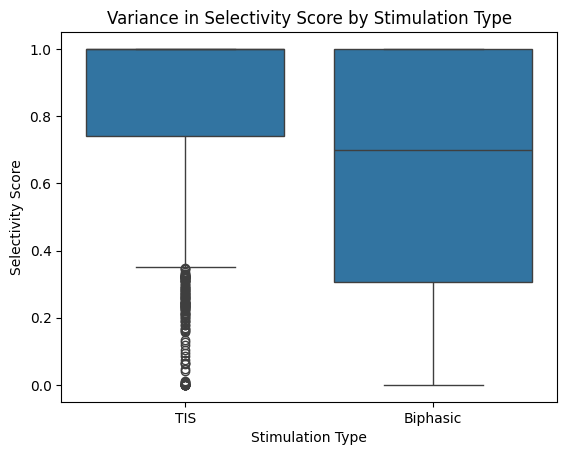

In [ ]:
# Variance Explained by Stimulation Type
print(long_df_reassigned.groupby("Stimulation Type")["Selectivity Score"].describe())

sns.boxplot(x="Stimulation Type", y="Selectivity Score", data=long_df_reassigned)
plt.title("Variance in Selectivity Score by Stimulation Type")
plt.show()

In [ ]:
#Filter based on 'Keep' column - remove rows with no movement

long_df_cleaned = long_df_reassigned[long_df_reassigned['Keep'] == 1]
display(long_df_cleaned)


,Stimulation Type,Animal ID,Configuration ID,Configuration Type,Selectivity Score,Keep,Stimulation Type Num,Animal ID Num,Configuration ID Num,Configuration Type Num
0,TIS,Animal D,E14_46 & E27_58,4-ch,1.000000,1.0,1,1,1,4
1,TIS,Animal D,E3_34 & E14_46,4-ch,0.850222,1.0,1,1,2,4
2,TIS,Animal D,E3_34 & E27_58,4-ch,0.472807,1.0,1,1,3,4
3,TIS,Animal F,Configuration A,4-ch,0.240000,1.0,1,2,4,4
4,TIS,Animal F,Configuration B,4-ch,0.330000,1.0,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...
1098,TIS,Animal L,121,4-ch,0.326449,1.0,1,8,196,4
1099,TIS,Animal L,122,4-ch,0.274058,1.0,1,8,197,4
1100,TIS,Animal L,123,4-ch,0.318823,1.0,1,8,198,4
1101,TIS,Animal L,124,4-ch,0.302449,1.0,1,8,199,4


<ipython-input-24-03b1dc5e5949>:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  long_df_no_outliers = grouped.apply(remove_outliers_zscore).reset_index(drop=True)


Number of outliers removed per group:
 Stimulation Type
Biphasic     0
TIS         26
dtype: int64


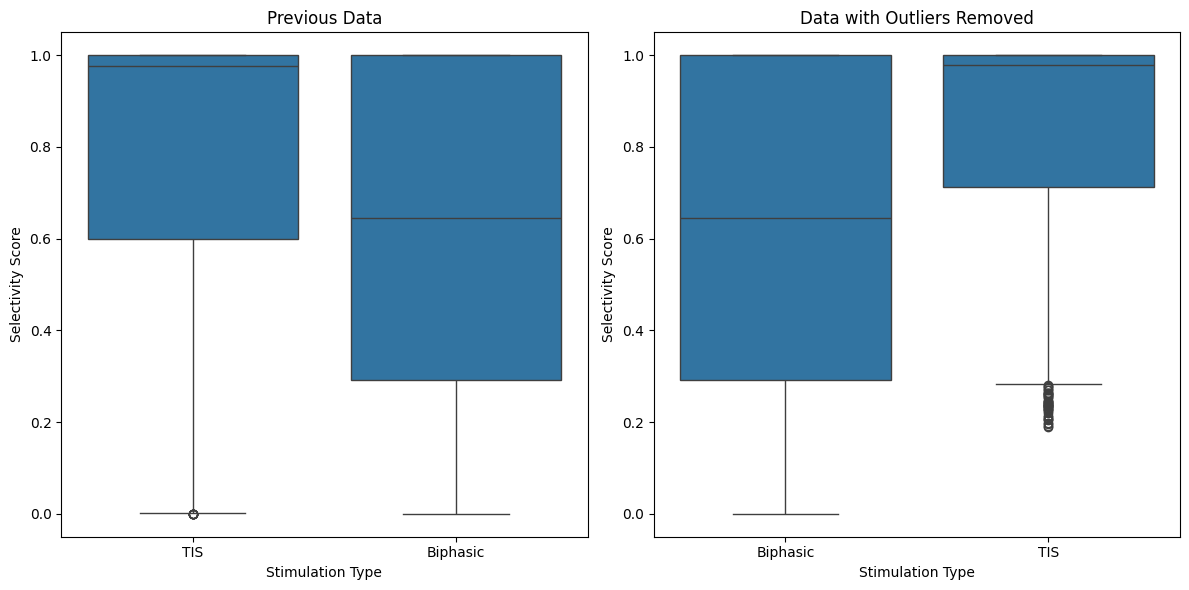

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats  # Import scipy.stats instead

# Assuming long_df_cleaned is already defined from your previous code

def remove_outliers_zscore(group):
    """Removes outliers from a group using z-score method."""
    z_scores = np.abs(stats.zscore(group['Selectivity Score']))
    filtered_group = group[(z_scores < 2)]  # Adjust the threshold (3) as needed
    return filtered_group

# Apply the function to each group
grouped = long_df_cleaned.groupby('Stimulation Type')
long_df_no_outliers = grouped.apply(remove_outliers_zscore).reset_index(drop=True)


#Count outliers for each group
outlier_counts = long_df_cleaned.groupby('Stimulation Type').size() - long_df_no_outliers.groupby('Stimulation Type').size()
print("Number of outliers removed per group:\n", outlier_counts)


# Create the box plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Stimulation Type', y='Selectivity Score', data=long_df_cleaned)
plt.title('Previous Data')

plt.subplot(1, 2, 2)
sns.boxplot(x='Stimulation Type', y='Selectivity Score', data=long_df_no_outliers)
plt.title('Data with Outliers Removed')

plt.tight_layout()
plt.show()

                  count      mean       std       min       25%       50%  \
Stimulation Type                                                            
Biphasic          164.0  0.628451  0.341728  0.000012  0.291039  0.644061   
TIS               676.0  0.786290  0.299448  0.000008  0.600362  0.975951   

                  75%  max  
Stimulation Type            
Biphasic          1.0  1.0  
TIS               1.0  1.0  


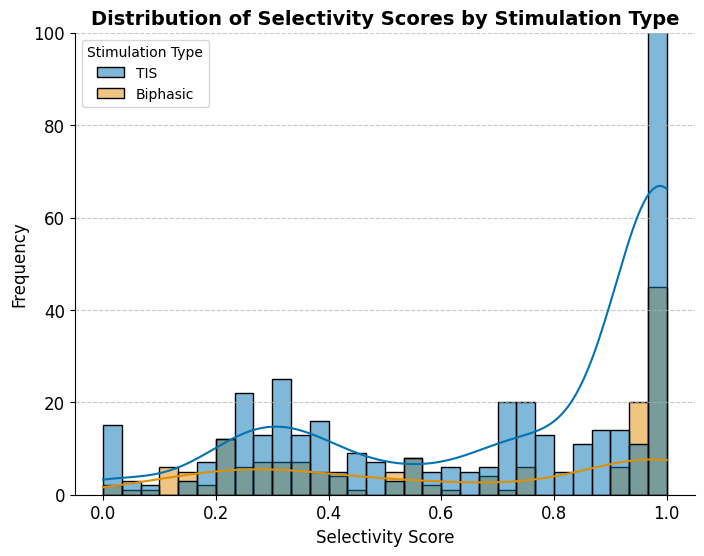

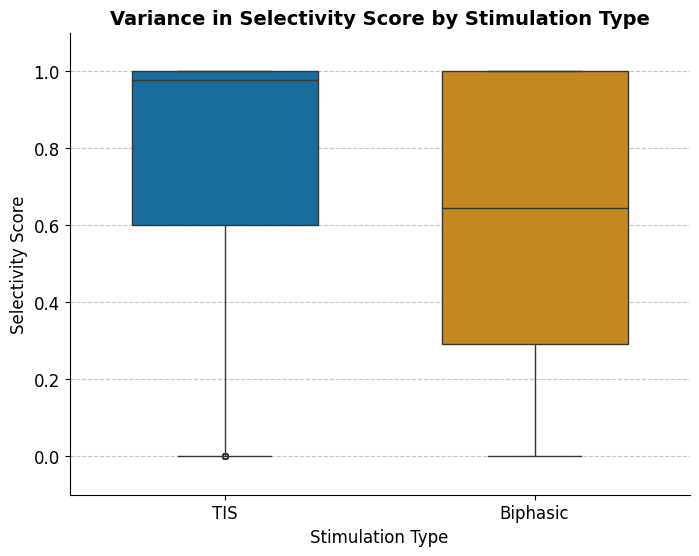

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variance Explained by Stimulation Type
print(long_df_cleaned.groupby("Stimulation Type")["Selectivity Score"].describe())

# --- Histogram ---
plt.figure(figsize=(8, 6))
sns.histplot(data=long_df_cleaned, x="Selectivity Score", hue="Stimulation Type",
             palette="colorblind", kde=True, bins=30)  # Adjust bins as needed
plt.title("Distribution of Selectivity Scores by Stimulation Type", fontsize=14, fontweight='bold')
plt.xlabel("Selectivity Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.ylim(0, 100)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

# Show and save the histogram (TIFF, 600 dpi)
plt.savefig("histogram.tiff", dpi=600, format="tiff")
plt.show()

# --- Box Plot ---
plt.figure(figsize=(8, 6))  # Adjust figure size for better proportions

# Custom color palette (inspired by Nature/Science journals)
colors = ["#3498db", "#e74c3c"]  # Blue and red
# or try 'muted' for colors ["#4878d0", "#ee854a"] or seaborn palettes: "deep", "pastel", "dark", "bright", "colorblind"

# Create the box plot with custom colors
ax = sns.boxplot(x="Stimulation Type", y="Selectivity Score", hue="Stimulation Type",data=long_df_cleaned,
                 palette="colorblind", width=0.6, flierprops={"marker": "o", "markersize": 4})  # Adjust width as needed

# Customize plot elements
plt.title("Variance in Selectivity Score by Stimulation Type", fontsize=14, fontweight='bold')
plt.xlabel("Stimulation Type", fontsize=12)
plt.ylabel("Selectivity Score", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(-0.1, 1.1)


# Add a grid for better readability (optional)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines (optional, for a cleaner look)
sns.despine()

# Show and save the box plot (TIFF, 600 dpi)
plt.savefig("boxplot.tiff", dpi=600, format="tiff")
plt.show()

# from google.colab import files
# files.download('histogram.tiff')
# files.download('boxplot.tiff')


Mann-Whitney U test before bootstrap (TIS > Biphasic): Statistic = 70394.0000, p-value = 0.0000
Two-sample KS test before bootstrap (TIS > Biphasic): Statistic = 0.0161, p-value = 0.9221
Levene's Test for Unequal Variance: Statistic = 21.8196, p-value = 0.0000


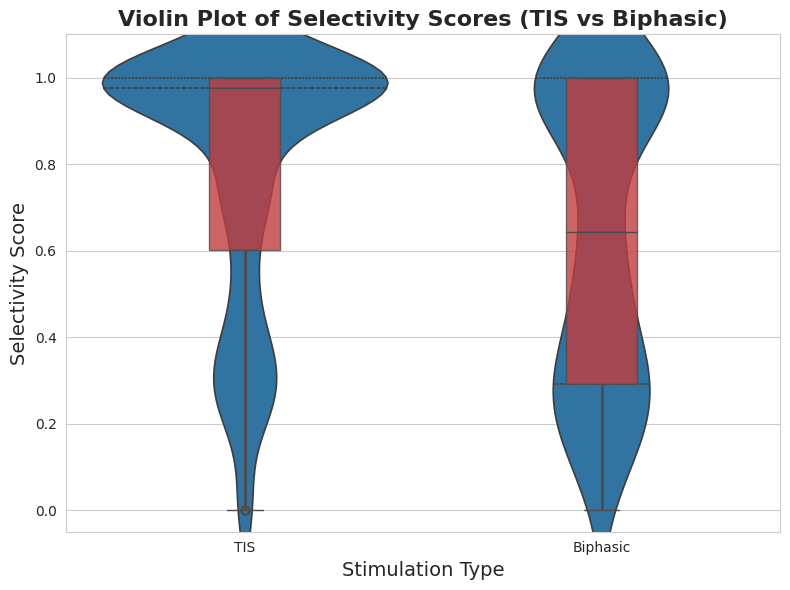

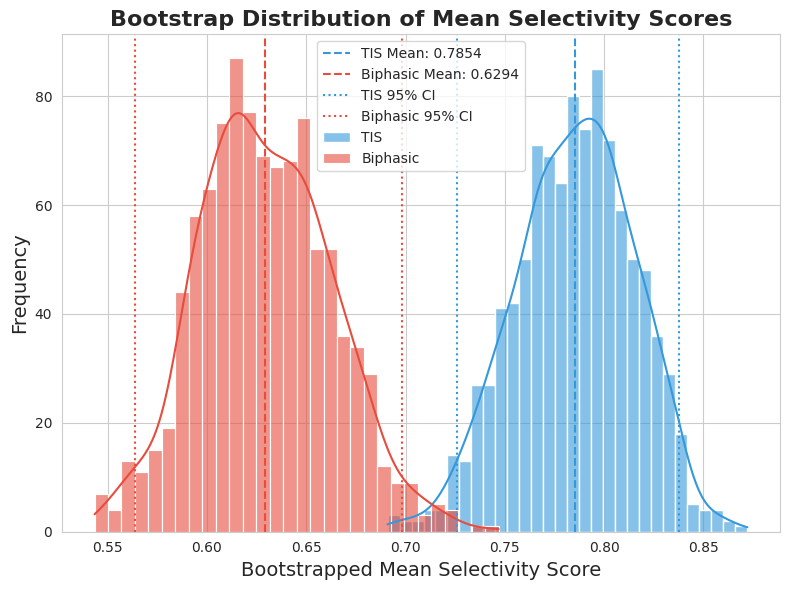


Average p-value across bootstrapped samples (Mann-Whitney U): 0.008488
Average p-value across bootstrapped samples (KS): 0.938985


/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:716: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


TIS Goodness of Fit (KS Test): Statistic = 0.4172, p-value = 0.0000
Biphasic Goodness of Fit (KS Test): Statistic = 0.2744, p-value = 0.0000


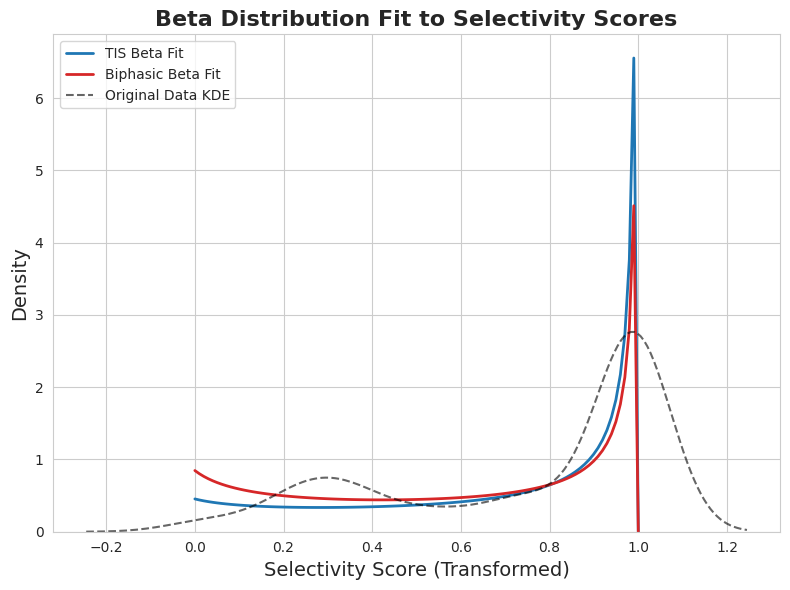

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import mannwhitneyu, beta, kstest, f, levene
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
import matplotlib.gridspec as gridspec

# Set Seaborn style and color palette for accessibility
sns.set_style("whitegrid")
sns.set_palette(["#1f77b4", "#d62728"])  # Blue for TIS, Red-Brown for Biphasic

# Preliminary statistical tests before bootstrapping

tis_scores = long_df_cleaned[long_df_cleaned['Stimulation Type'] == 'TIS']['Selectivity Score']
biphasic_scores = long_df_cleaned[long_df_cleaned['Stimulation Type'] == 'Biphasic']['Selectivity Score']

u_statistic, p_value_mannwhitneyu = mannwhitneyu(tis_scores, biphasic_scores, alternative='greater')
print(f"\nMann-Whitney U test before bootstrap (TIS > Biphasic): Statistic = {u_statistic:.4f}, p-value = {p_value_mannwhitneyu:.4f}")

ks_statistic, p_value_ks = kstest(tis_scores, biphasic_scores, alternative='greater')
print(f"Two-sample KS test before bootstrap (TIS > Biphasic): Statistic = {ks_statistic:.4f}, p-value = {p_value_ks:.4f}")

variance_tis = np.var(tis_scores, ddof=1)  # ddof=1 for sample variance
variance_biphasic = np.var(biphasic_scores, ddof=1)


# Levene's test for unequal variance
levene_statistic, p_value_levene = levene(tis_scores, biphasic_scores)
print(f"Levene's Test for Unequal Variance: Statistic = {levene_statistic:.4f}, p-value = {p_value_levene:.4f}")

# ------------------------------
# Figure 1: Violin Plot (Improved Visualization)
# ------------------------------
plt.figure(figsize=(8, 6))
sns.violinplot(x="Stimulation Type", y="Selectivity Score", data=long_df_cleaned, inner="quartile")
sns.boxplot(x="Stimulation Type", y="Selectivity Score", data=long_df_cleaned, width=0.2, boxprops={'zorder': 2, 'alpha':0.8}, showcaps=True, whiskerprops={'linewidth': 2})

plt.title("Violin Plot of Selectivity Scores (TIS vs Biphasic)", fontsize=16, fontweight='bold')
plt.xlabel("Stimulation Type", fontsize=14)
plt.ylabel("Selectivity Score", fontsize=14)
plt.ylim(-0.05, 1.1)
plt.tight_layout()
plt.savefig("violin_boxplot.tiff", dpi=600, format="tiff")
plt.show()

# ------------------------------
# Figure 2: Bootstrap Resampling (Sample Size = 100, Improved Aesthetics)
# ------------------------------
n_iterations = 1000
sample_size = 100  # Fixed bootstrap sample size
np.random.seed(42)

boot_means_tis = np.zeros(n_iterations)
boot_means_biphasic = np.zeros(n_iterations)
boot_p_values_mannwhitneyu = np.zeros(n_iterations)
boot_p_values_ks = np.zeros(n_iterations)

tis_scores = long_df_cleaned[long_df_cleaned['Stimulation Type'] == 'TIS']['Selectivity Score']
biphasic_scores = long_df_cleaned[long_df_cleaned['Stimulation Type'] == 'Biphasic']['Selectivity Score']

for i in range(n_iterations):
    sample_tis = np.random.choice(tis_scores, size=sample_size, replace=True)
    sample_biphasic = np.random.choice(biphasic_scores, size=sample_size, replace=True)
    boot_means_tis[i] = np.mean(sample_tis)
    boot_means_biphasic[i] = np.mean(sample_biphasic)

    # Perform Mann-Whitney U test on each bootstrap sample
    _, boot_p_values_mannwhitneyu[i] = mannwhitneyu(sample_tis, sample_biphasic, alternative='greater')

    # Perform KS test on each bootstrap sample
    _, boot_p_values_ks[i] = kstest(sample_tis, sample_biphasic, alternative='greater')

avg_boot_p_mannwhitneyu = np.mean(boot_p_values_mannwhitneyu)
avg_boot_p_ks = np.mean(boot_p_values_ks)

# Calculate confidence intervals
confidence_level = 0.95  # 95% confidence interval
tis_ci = np.percentile(boot_means_tis, [(1 - confidence_level) / 2 * 100, (1 + confidence_level) / 2 * 100])
biphasic_ci = np.percentile(boot_means_biphasic, [(1 - confidence_level) / 2 * 100, (1 + confidence_level) / 2 * 100])

# Plot the bootstrap distributions
plt.figure(figsize=(8, 6))
sns.histplot(boot_means_tis, color="#3498db", label="TIS", kde=True, bins=30, alpha=0.6)
sns.histplot(boot_means_biphasic, color="#e74c3c", label="Biphasic", kde=True, bins=30, alpha=0.6)

# Add vertical lines for means and confidence intervals
plt.axvline(np.mean(boot_means_tis), color="#3498db", linestyle="dashed", label=f"TIS Mean: {np.mean(boot_means_tis):.4f}")
plt.axvline(np.mean(boot_means_biphasic), color="#e74c3c", linestyle="dashed", label=f"Biphasic Mean: {np.mean(boot_means_biphasic):.4f}")
plt.axvline(tis_ci[0], color="#3498db", linestyle="dotted", label=f"TIS {confidence_level*100:.0f}% CI")
plt.axvline(tis_ci[1], color="#3498db", linestyle="dotted")
plt.axvline(biphasic_ci[0], color="#e74c3c", linestyle="dotted", label=f"Biphasic {confidence_level*100:.0f}% CI")
plt.axvline(biphasic_ci[1], color="#e74c3c", linestyle="dotted")


plt.title("Bootstrap Distribution of Mean Selectivity Scores", fontsize=16, fontweight='bold')
plt.xlabel("Bootstrapped Mean Selectivity Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig("hist_bootstrp.tiff", dpi=600, format="tiff")
plt.show()

print(f"\nAverage p-value across bootstrapped samples (Mann-Whitney U): {avg_boot_p_mannwhitneyu:.6f}")
print(f"Average p-value across bootstrapped samples (KS): {avg_boot_p_ks:.6f}")

# ------------------------------
# Figure 3: Beta Distribution Fit (Using scipy.stats.beta, Enhanced Aesthetics)
# ------------------------------
df_beta = long_df_cleaned.copy()
df_beta["Selectivity Score Transformed"] = df_beta["Selectivity Score"].clip(1e-4, 1-1e-4)  # Avoid 0 and 1

# Fit Beta distribution to TIS and Biphasic separately
tis_params = beta.fit(df_beta[df_beta['Stimulation Type'] == 'TIS']["Selectivity Score Transformed"])
ks_statistic_tis, p_value_tis = kstest(tis_scores, 'beta', args=tis_params)

biphasic_params = beta.fit(df_beta[df_beta['Stimulation Type'] == 'Biphasic']["Selectivity Score Transformed"])
ks_statistic_biphasic, p_value_biphasic = kstest(biphasic_scores, 'beta', args=biphasic_params)

print(f"TIS Goodness of Fit (KS Test): Statistic = {ks_statistic_tis:.4f}, p-value = {p_value_tis:.4f}")
print(f"Biphasic Goodness of Fit (KS Test): Statistic = {ks_statistic_biphasic:.4f}, p-value = {p_value_biphasic:.4f}")


# Generate density curves
x = np.linspace(0, 1, 100)
tis_pdf = beta.pdf(x, *tis_params)
biphasic_pdf = beta.pdf(x, *biphasic_params)

plt.figure(figsize=(8, 6))
plt.plot(x, tis_pdf, label="TIS Beta Fit", color="#1f77b4", linewidth=2)
plt.plot(x, biphasic_pdf, label="Biphasic Beta Fit", color="#d62728", linewidth=2)
sns.kdeplot(df_beta["Selectivity Score Transformed"], label="Original Data KDE", color="black", linestyle="dashed", alpha=0.6)

plt.title("Beta Distribution Fit to Selectivity Scores", fontsize=16, fontweight='bold')
plt.xlabel("Selectivity Score (Transformed)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig("beta_fitting.tiff", dpi=600, format="tiff")
plt.show()


from google.colab import files
files.download('violin_boxplot.tiff')
files.download('hist_bootstrp.tiff')
files.download('beta_fitting.tiff')



In [ ]:
# Clear the current color palette
sns.reset_orig()

           count      mean       std       min       25%       50%       75%  \
Animal ID                                                                      
Animal D     3.0  0.774343  0.271664  0.472807  0.661515  0.850222  0.925111   
Animal F     4.0  0.467500  0.228965  0.240000  0.307500  0.440000  0.600000   
Animal G    32.0  0.809801  0.228105  0.191224  0.656416  0.916774  0.959552   
Animal H    41.0  0.587711  0.396915  0.110859  0.208660  0.452090  1.000000   
Animal I   384.0  0.931380  0.119327  0.392409  0.956882  0.986399  1.000000   
Animal J   258.0  0.878583  0.272609  0.003208  1.000000  1.000000  1.000000   
Animal K    64.0  0.676447  0.254565  0.217664  0.489312  0.694052  0.940000   
Animal L   320.0  0.625080  0.373579  0.000008  0.281538  0.712974  1.000000   

                max  
Animal ID            
Animal D   1.000000  
Animal F   0.750000  
Animal G   1.000000  
Animal H   1.000000  
Animal I   1.000000  
Animal J   1.000000  
Animal K   0.961835  
A

<ipython-input-81-9ac1d68d2bfe>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Animal ID Num", y="Selectivity Score", data=long_df_reassigned,


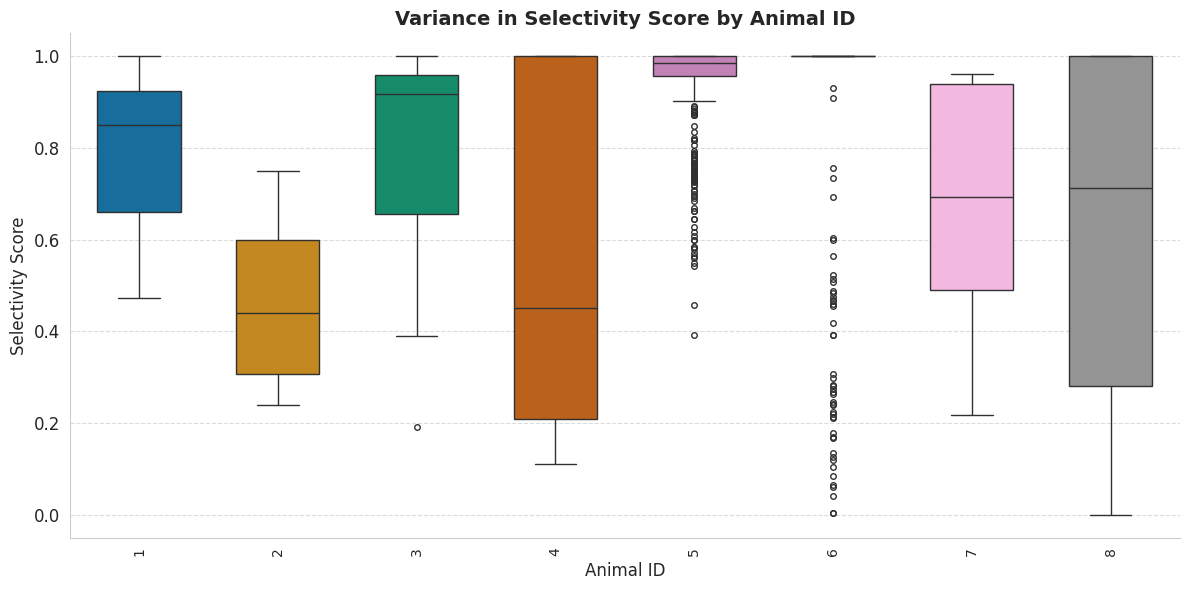

In [ ]:
# Variance Explained by Animal ID on Selectivity Score
print(long_df_reassigned.groupby("Animal ID")["Selectivity Score"].describe())

# Graph the Box Plot
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability with many Animal IDs

# Create the box plot with custom colors and outlier styling
ax = sns.boxplot(x="Animal ID Num", y="Selectivity Score", data=long_df_reassigned,
                 palette="colorblind", width=0.6, flierprops={"marker": "o", "markersize": 4})

# Customize plot elements
plt.title("Variance in Selectivity Score by Animal ID", fontsize=14, fontweight='bold')  # Corrected title
plt.xlabel("Animal ID", fontsize=12)
plt.ylabel("Selectivity Score", fontsize=12)
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels for readability
plt.yticks(fontsize=12)

# Add a grid for better readability (optional)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines (optional, for a cleaner look)
sns.despine()

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

Top Configurations by Selectivity:
 Configuration ID Num
1     1.0
67    1.0
46    1.0
47    1.0
48    1.0
49    1.0
56    1.0
57    1.0
58    1.0
59    1.0
Name: Selectivity Score, dtype: float64


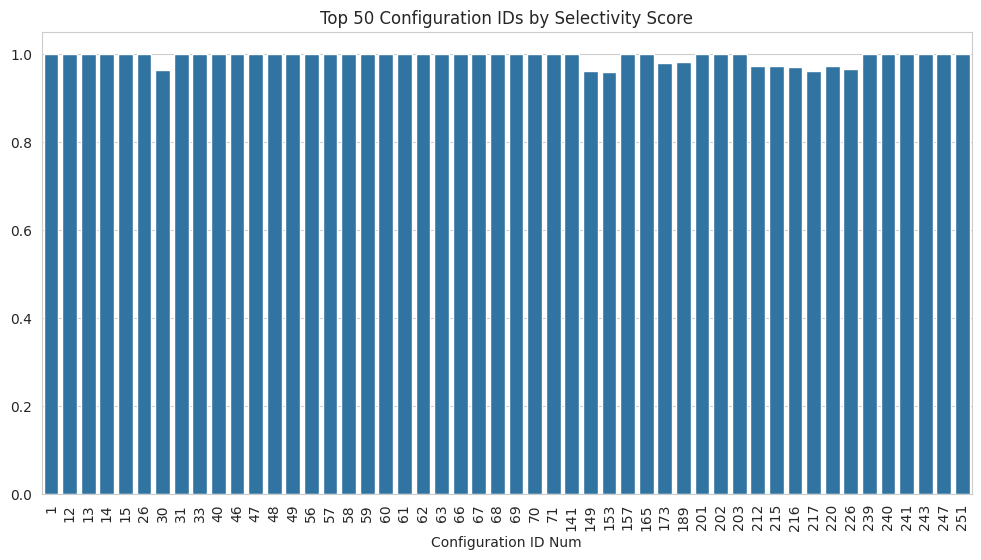

In [ ]:
# Identify Configuration IDs with the Highest Selectivity
top_configurations = long_df_reassigned.groupby("Configuration ID Num")["Selectivity Score"].mean().sort_values(ascending=False)
print("Top Configurations by Selectivity:\n", top_configurations.head(10))
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_configurations.head(50).index, y=top_configurations.head(50).values,
                 width=0.8)  # Adjust width as needed
plt.xticks(rotation=90)
plt.title("Top 50 Configuration IDs by Selectivity Score")
plt.show()

                    count      mean       std       min       25%       50%  \
Configuration Type                                                            
2-ch                157.0  0.651814  0.345826  0.000012  0.307378  0.734838   
3-ch TL               7.0  0.434986  0.201079  0.151479  0.319377  0.424639   
3-ch TT               5.0  0.537262  0.330234  0.208660  0.282932  0.452090   
4-ch                937.0  0.825805  0.288627  0.000008  0.739479  1.000000   

                         75%   max  
Configuration Type                  
2-ch                1.000000  1.00  
3-ch TL             0.540013  0.75  
3-ch TT             0.742628  1.00  
4-ch                1.000000  1.00  
Effect of Configuration Type:
 Configuration Type
2-ch       0.651814
3-ch TL    0.434986
3-ch TT    0.537262
4-ch       0.825805
Name: Selectivity Score, dtype: float64


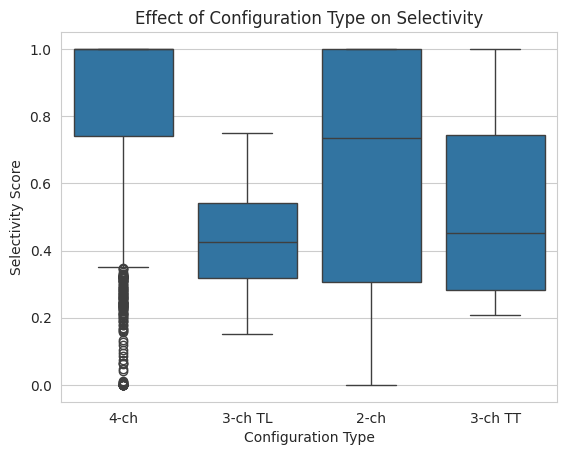

In [ ]:
# Effect of Configuration Type on Selectivity
print(long_df_reassigned.groupby("Configuration Type")["Selectivity Score"].describe())
config_effect = long_df_reassigned.groupby("Configuration Type")["Selectivity Score"].mean()
print("Effect of Configuration Type:\n", config_effect)
sns.boxplot(x="Configuration Type", y="Selectivity Score", data=long_df_reassigned)
plt.title("Effect of Configuration Type on Selectivity")
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
<ipython-input-118-f9d653d32824>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

                   Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     Selectivity_Score
No. Observations:     1106        Method:                 REML             
No. Groups:           8           Scale:                  0.0733           
Min. group size:      3           Log-Likelihood:         -164.2913        
Max. group size:      384         Converged:              Yes              
Mean group size:      138.2                                                
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                         0.704    0.107  6.565 0.000  0.494  0.914
Stimulation_Type_Num              0.067    0.052  1.295 0.195 -0.034  0.168
Configuration_ID_Num              0.001    0.009  0.084 0.933 -0.017  0.018
Configuration_Type_Num         

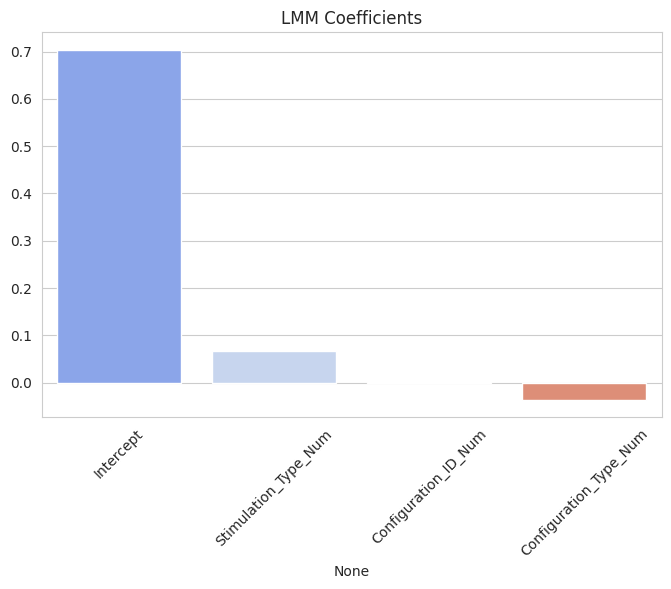

In [ ]:
# Linear Mixed-Effects Model (LMM)
def run_lmm(df):
    df = df.rename(columns={"Selectivity Score": "Selectivity_Score",
                            "Stimulation Type Num": "Stimulation_Type_Num",
                            "Configuration Type Num": "Configuration_Type_Num",
                            "Animal ID Num": "Animal_ID_Num",
                            "Configuration ID Num": "Configuration_ID_Num"})
    model = smf.mixedlm("Selectivity_Score ~ Stimulation_Type_Num + Configuration_ID_Num + Configuration_Type_Num", df, groups=df["Animal_ID_Num"], re_formula="~Configuration_ID_Num")
    result = model.fit()
    print(result.summary())
    return result

# Execute Analysis
if __name__ == "__main__":
    lmm_result = run_lmm(long_df_reassigned)

    # Plot LMM Coefficients
    coefs = lmm_result.fe_params
    plt.figure(figsize=(8, 5))
    sns.barplot(x=coefs.index, y=coefs.values, palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title("LMM Coefficients")
    plt.show()

Number of trials per Configuration ID:
Configuration ID Num
126    7
135    7
115    7
116    7
117    7
      ..
49     1
50     1
51     1
52     1
251    1
Name: count, Length: 251, dtype: int64


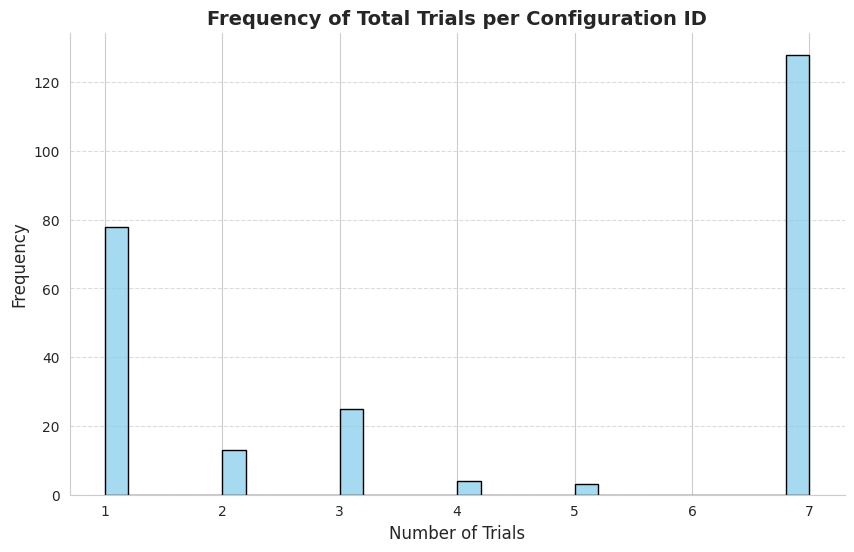

In [ ]:
# Check the number of trials per Configuration ID in your actual DataFrame
trials_per_configuration_id = long_df_reassigned["Configuration ID Num"].value_counts()

print("Number of trials per Configuration ID:")
print(trials_per_configuration_id)

# --- Histogram of Trials per Configuration ID ---
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.histplot(trials_per_configuration_id, bins=30, color='skyblue', edgecolor='black')
plt.title("Frequency of Total Trials per Configuration ID", fontsize=14, fontweight='bold')
plt.xlabel("Number of Trials", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.show()


<ipython-input-120-8622233cc78d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Configuration ID Num", y="Trial Count", data=trials_df, palette="viridis")


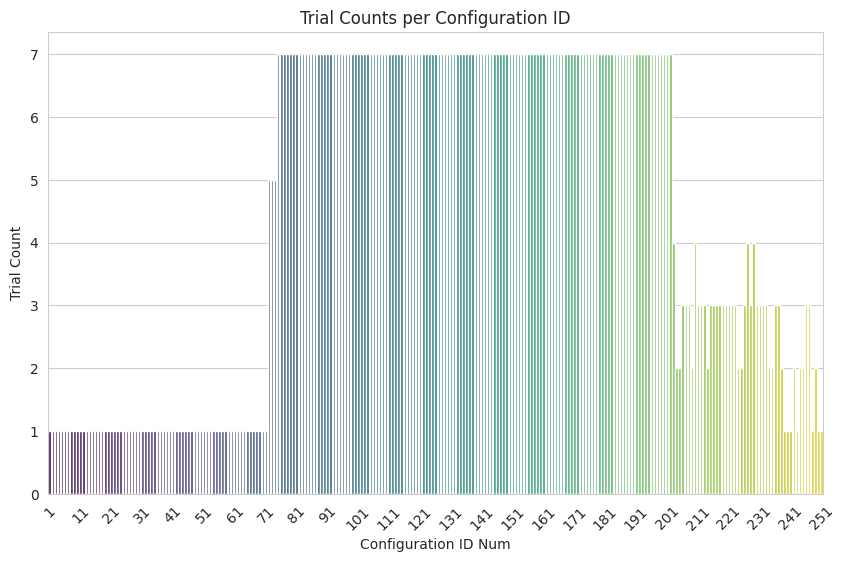

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the number of trials per Configuration ID in your actual DataFrame
trials_per_configuration_id = long_df_reassigned["Configuration ID Num"].value_counts()

# Convert to DataFrame for easier plotting
trials_df = trials_per_configuration_id.reset_index()
trials_df.columns = ["Configuration ID Num", "Trial Count"]

# Plot the trial counts per Configuration ID
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Configuration ID Num", y="Trial Count", data=trials_df, palette="viridis")
plt.xlabel("Configuration ID Num")
plt.ylabel("Trial Count")
plt.title("Trial Counts per Configuration ID")


# Adjust x-axis labels to skip every 10
for i, label in enumerate(ax.get_xticklabels()):
    if i % 10 != 0:
        label.set_visible(False)  # Hide labels that are not multiples of 10

plt.xticks(rotation=45)  # Rotate the remaining labels
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
<ipython-input-121-50662dd34245>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefs.index, y=coefs.values, palette="coolwarm")


                   Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     Selectivity_Score
No. Observations:     1106        Method:                 REML             
No. Groups:           8           Scale:                  0.0737           
Min. group size:      3           Log-Likelihood:         -144.9125        
Max. group size:      384         Converged:              Yes              
Mean group size:      138.2                                                
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                         0.760    0.079  9.649 0.000  0.606  0.914
Stimulation_Type_Num              0.073    0.052  1.418 0.156 -0.028  0.174
Configuration_Type_Num           -0.043    0.036 -1.184 0.236 -0.113  0.028
Group Var                      

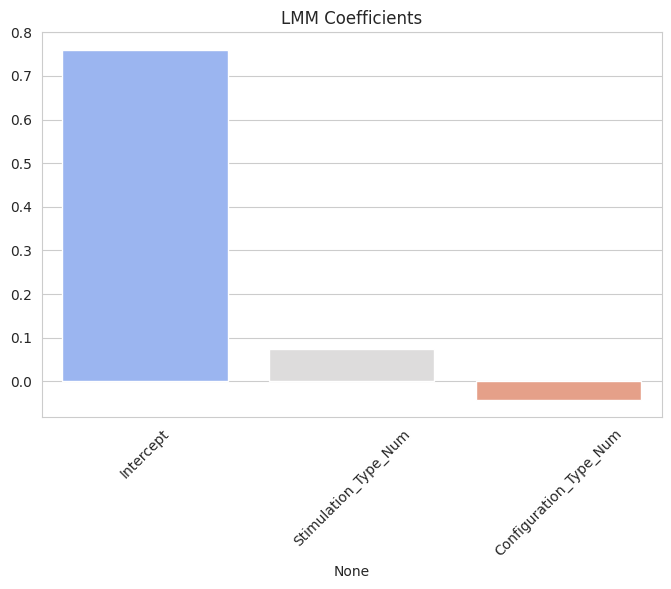

In [ ]:
# Linear Mixed-Effects Model (LMM)
def run_lmm(df):
    df = df.rename(columns={"Selectivity Score": "Selectivity_Score",
                            "Stimulation Type Num": "Stimulation_Type_Num",
                            "Configuration Type Num": "Configuration_Type_Num",
                            "Animal ID Num": "Animal_ID_Num",
                            "Configuration ID Num": "Configuration_ID_Num"})
    model = smf.mixedlm("Selectivity_Score ~ Stimulation_Type_Num + Configuration_Type_Num", df, groups=df["Animal_ID_Num"], re_formula="~Configuration_ID_Num")
    result = model.fit()
    print(result.summary())
    return result

# Execute Analysis
if __name__ == "__main__":
    lmm_result = run_lmm(long_df_reassigned)

    # Plot LMM Coefficients
    coefs = lmm_result.fe_params
    plt.figure(figsize=(8, 5))
    sns.barplot(x=coefs.index, y=coefs.values, palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title("LMM Coefficients")
    plt.show()

In [ ]:
##Check for Colinearity between predictors to see if you can model the Interaction (*)

predictors = long_df_reassigned[['Stimulation Type Num', 'Configuration Type Num']]
predictors['Interaction'] = predictors['Stimulation Type Num'] * predictors['Configuration Type Num']
correlations = predictors.corr()
print(correlations)

                        Stimulation Type Num  Configuration Type Num  \
Stimulation Type Num                1.000000                0.768704   
Configuration Type Num              0.768704                1.000000   
Interaction                         1.000000                0.768704   

                        Interaction  
Stimulation Type Num       1.000000  
Configuration Type Num     0.768704  
Interaction                1.000000  


<ipython-input-122-ff30a8928bbe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictors['Interaction'] = predictors['Stimulation Type Num'] * predictors['Configuration Type Num']


In [ ]:
# Linear Mixed-Effects Model (LMM)
def run_lmm(df):
    df = df.rename(columns={"Selectivity Score": "Selectivity_Score",
                            "Stimulation Type Num": "Stimulation_Type_Num",
                            "Configuration Type Num": "Configuration_Type_Num",
                            "Animal ID Num": "Animal_ID_Num",
                            "Configuration ID Num": "Configuration_ID_Num"})
    model = smf.mixedlm("Selectivity_Score ~ Stimulation_Type_Num * Configuration_Type_Num", df, groups=df["Animal_ID_Num"], re_formula="~Configuration_ID_Num")
    result = model.fit()
    print(result.summary())
    return result

# Execute Analysis
if __name__ == "__main__":
    lmm_result = run_lmm(long_df_reassigned)

    # Plot LMM Coefficients
    coefs = lmm_result.fe_params
    plt.figure(figsize=(8, 5))
    sns.barplot(x=coefs.index, y=coefs.values, palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title("LMM Coefficients")
    plt.show()



LinAlgError: Singular matrix

In [ ]:
!pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 MB 21.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.1 which is incompatible.


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(


                   Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     Selectivity_Score
No. Observations:     1106        Method:                 REML             
No. Groups:           8           Scale:                  0.0737           
Min. group size:      3           Log-Likelihood:         -144.9125        
Max. group size:      384         Converged:              Yes              
Mean group size:      138.2                                                
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                         0.760    0.079  9.649 0.000  0.606  0.914
Stimulation_Type_Num              0.073    0.052  1.418 0.156 -0.028  0.174
Configuration_Type_Num           -0.043    0.036 -1.184 0.236 -0.113  0.028
Group Var                      

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


                 Generalized Linear Model Regression Results                  
Dep. Variable:      Selectivity_Score   No. Observations:                  540
Model:                            GLM   Df Residuals:                      323
Model Family:                Binomial   Df Model:                          216
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Sat, 15 Feb 2025   Deviance:                       12954.
Time:                        01:30:11   Pearson chi2:                 3.13e+17
No. Iterations:                   100   Pseudo R-squ. (CS):               -inf
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

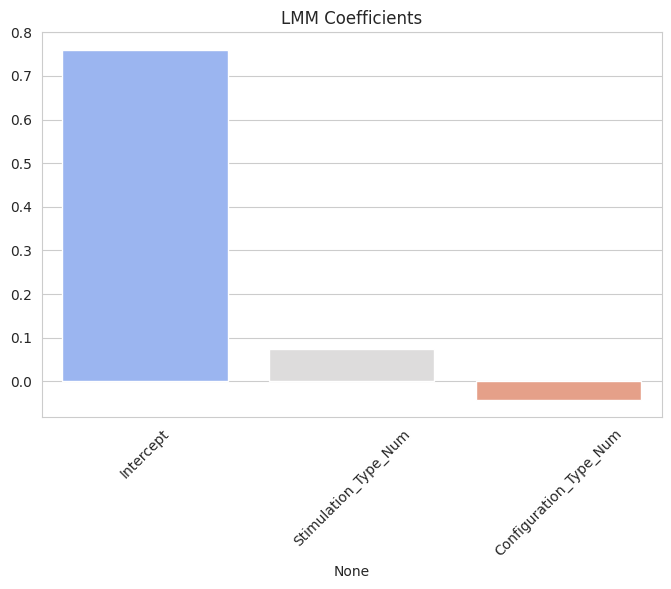

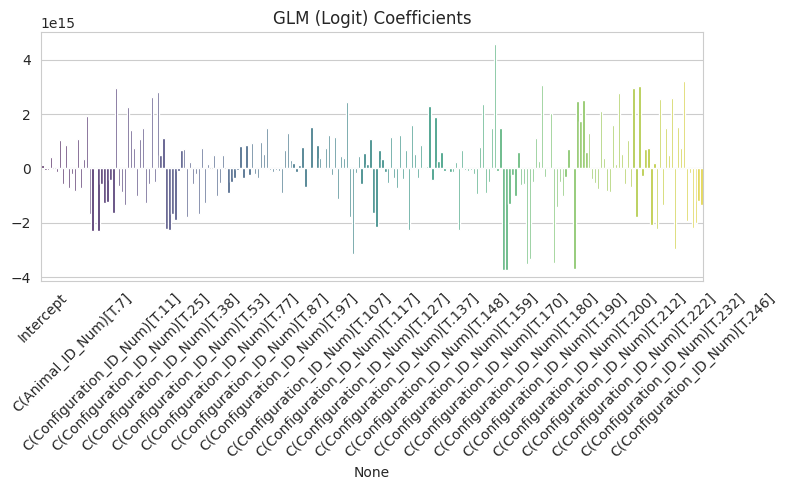

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import entropy, permutation_test
from scipy.spatial.distance import jensenshannon
from scipy.special import kl_div
import io
from google.colab import files
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import logit

# Linear Mixed-Effects Model (LMM)
def run_lmm(df):
    df = df.rename(columns={"Selectivity Score": "Selectivity_Score",
                            "Stimulation Type Num": "Stimulation_Type_Num",
                            "Configuration Type Num": "Configuration_Type_Num",
                            "Animal ID Num": "Animal_ID_Num",
                            "Configuration ID Num": "Configuration_ID_Num"})
    model = smf.mixedlm("Selectivity_Score ~ Stimulation_Type_Num + Configuration_Type_Num", df, groups=df["Animal_ID_Num"], re_formula="~Configuration_ID_Num")
    result = model.fit()
    print(result.summary())
    return result

# Generalized Linear Model (GLM) with Logit Link Function
def run_glm(df):
    # Ensure selectivity scores are in (0,1) for logit transformation
    df = df.rename(columns={"Selectivity Score": "Selectivity_Score",
                            "Stimulation Type Num": "Stimulation_Type_Num",
                            "Configuration Type Num": "Configuration_Type_Num",
                            "Animal ID Num": "Animal_ID_Num",
                            "Configuration ID Num": "Configuration_ID_Num"})
    df = df[(df["Selectivity_Score"] > 0) & (df["Selectivity_Score"] < 1)]

    model = smf.glm("Selectivity_Score ~ C(Stimulation_Type_Num) + C(Configuration_Type_Num) + C(Animal_ID_Num) + C(Configuration_ID_Num)",
                     df, family=Binomial(link=logit())).fit()
    print(model.summary())
    return model

# Execute Analysis
if __name__ == "__main__":
    lmm_result = run_lmm(long_df_reassigned)
    glm_result = run_glm(long_df_reassigned)

    # Plot LMM Coefficients
    coefs_lmm = lmm_result.fe_params
    plt.figure(figsize=(8, 5))
    sns.barplot(x=coefs_lmm.index, y=coefs_lmm.values, hue=coefs_lmm.index, dodge=False, palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title("LMM Coefficients")
    plt.show()

    # Plot GLM Coefficients
    coefs_glm = glm_result.params
    plt.figure(figsize=(8, 5))
    ax= sns.barplot(x=coefs_glm.index, y=coefs_glm.values, hue=coefs_glm.index, dodge=False, palette="viridis")
    plt.xticks(rotation=45)
    plt.title("GLM (Logit) Coefficients")

    # Adjust x-axis labels to skip every 10
    for i, label in enumerate(ax.get_xticklabels()):
        if i % 10 != 0:
            label.set_visible(False)  # Hide labels that are not multiples of 10

    plt.tight_layout()
    plt.show()

In [ ]:


# Linear Mixed-Effects Model (LMM)
def run_lmm(df):
    df = df.rename(columns={"Selectivity Score": "Selectivity_Score",
                            "Stimulation Type Num": "Stimulation_Type_Num",
                            "Configuration Type Num": "Configuration_Type_Num",
                            "Animal ID Num": "Animal_ID_Num",
                            "Configuration ID Num": "Configuration_ID_Num"})
    model = smf.mixedlm("Selectivity_Score ~ C(Stimulation_Type_Num) + Configuration_Type_Num", df, groups=df["Animal_ID_Num"], re_formula="~Configuration_ID_Num")
    result = model.fit()
    print(result.summary())
    return result

# Generalized Linear Model (GLM) with Dummy Coding
def run_glm_dummy(df):
    df = df.rename(columns={"Selectivity Score": "Selectivity_Score",
                            "Stimulation Type Num": "Stimulation_Type_Num",
                            "Configuration Type Num": "Configuration_Type_Num",
                            "Animal ID Num": "Animal_ID_Num",
                            "Configuration ID Num": "Configuration_ID_Num"})
    df = df[(df["Selectivity_Score"] > 0) & (df["Selectivity_Score"] < 1)]
    # model = smf.glm("Selectivity_Score ~ C(Stimulation_Type_Num) + C(Configuration_Type_Num) + C(Animal_ID_Num) + C(Configuration_ID_Num)",
    #                  df, family=Binomial(link=logit())).fit()
    model = smf.glm(
        "Selectivity_Score ~ C(Stimulation_Type_Num, Treatment(reference=0)) + "
        "Configuration_Type_Num + "
        "C(Animal_ID_Num, Treatment(reference=1)) ",
        df,
        family=Binomial(link=logit())
    ).fit()
    print(model.summary())
    return model

# Generalized Linear Model (GLM) with Sum Coding
def run_glm_sum(df):
    df = df.rename(columns={"Selectivity Score": "Selectivity_Score",
                            "Stimulation Type Num": "Stimulation_Type_Num",
                            "Configuration Type Num": "Configuration_Type_Num",
                            "Animal ID Num": "Animal_ID_Num",
                            "Configuration ID Num": "Configuration_ID_Num"})
    df = df[(df["Selectivity_Score"] > 0) & (df["Selectivity_Score"] < 1)]
    model = smf.glm("Selectivity_Score ~ C(Stimulation_Type_Num, Sum) + Configuration_Type_Num",
                     df, family=Binomial(link=logit())).fit()
    print(model.summary())
    return model


# Function to create a heatmap
def plot_heatmap(coefficients, title):
    coefs_df = pd.DataFrame(coefficients, columns=[title])
    plt.figure(figsize=(10, 6))
    sns.heatmap(coefs_df.T, cmap="mako", center=0, cbar_kws={'shrink': 0.8})
    plt.title(title)
    plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

                   Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     Selectivity_Score
No. Observations:     840         Method:                 REML             
No. Groups:           8           Scale:                  0.0767           
Min. group size:      3           Log-Likelihood:         -138.3727        
Max. group size:      300         Converged:              No               
Mean group size:      105.0                                                
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                         1.063    0.225  4.714 0.000  0.621  1.504
C(Stimulation_Type_Num)[T.1]      0.358    0.189  1.894 0.058 -0.013  0.728
Configuration_Type_Num           -0.172    0.098 -1.749 0.080 -0.364  0.021
Group Var                      

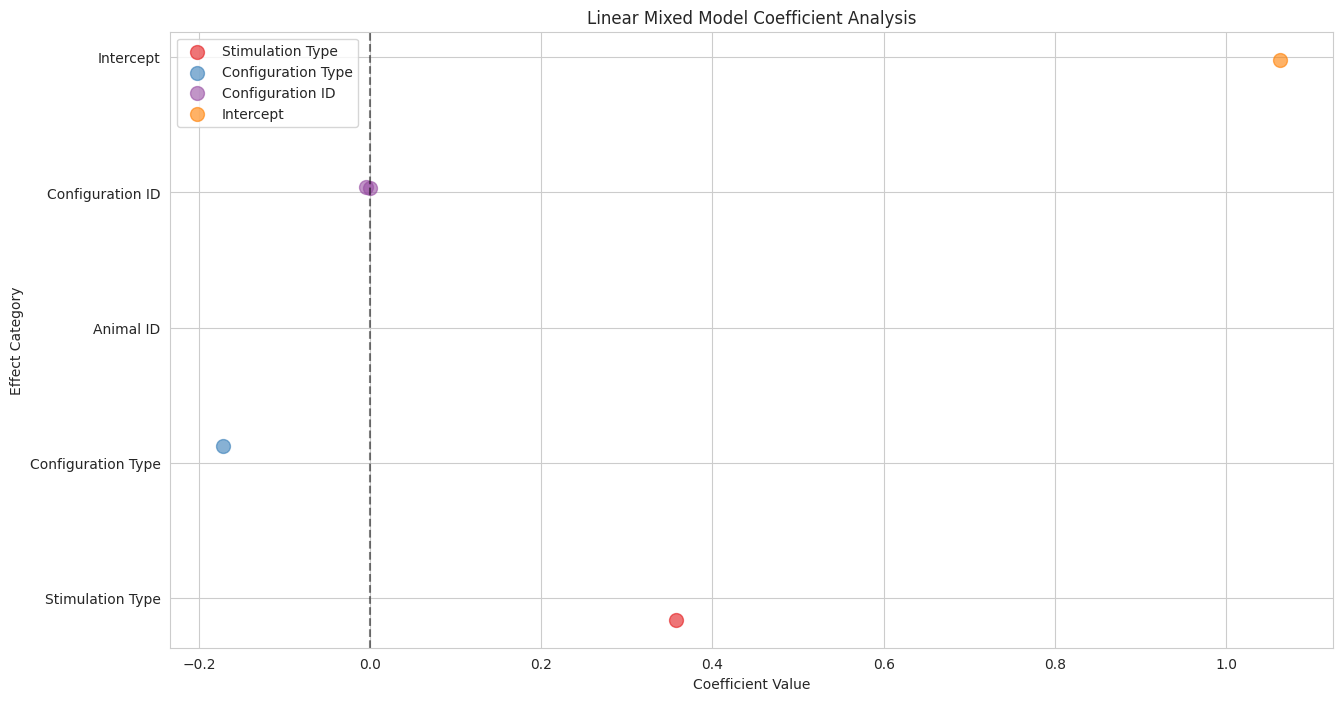

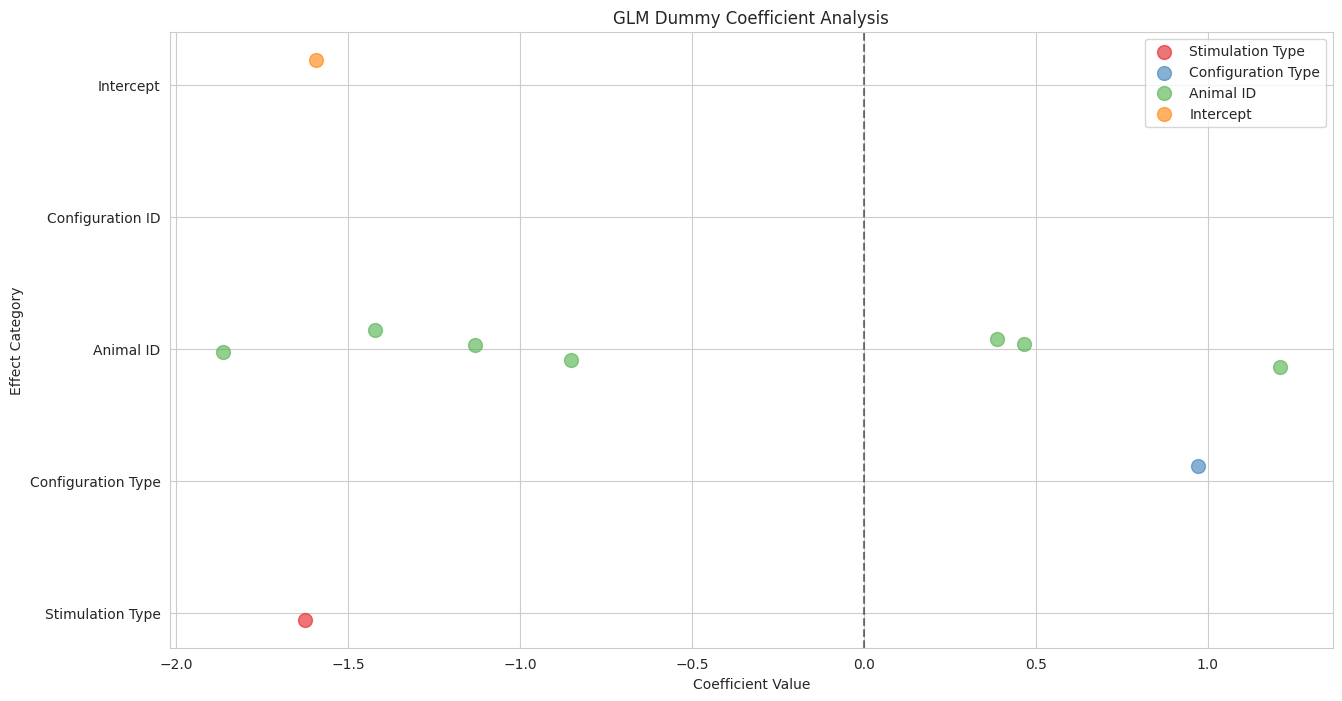

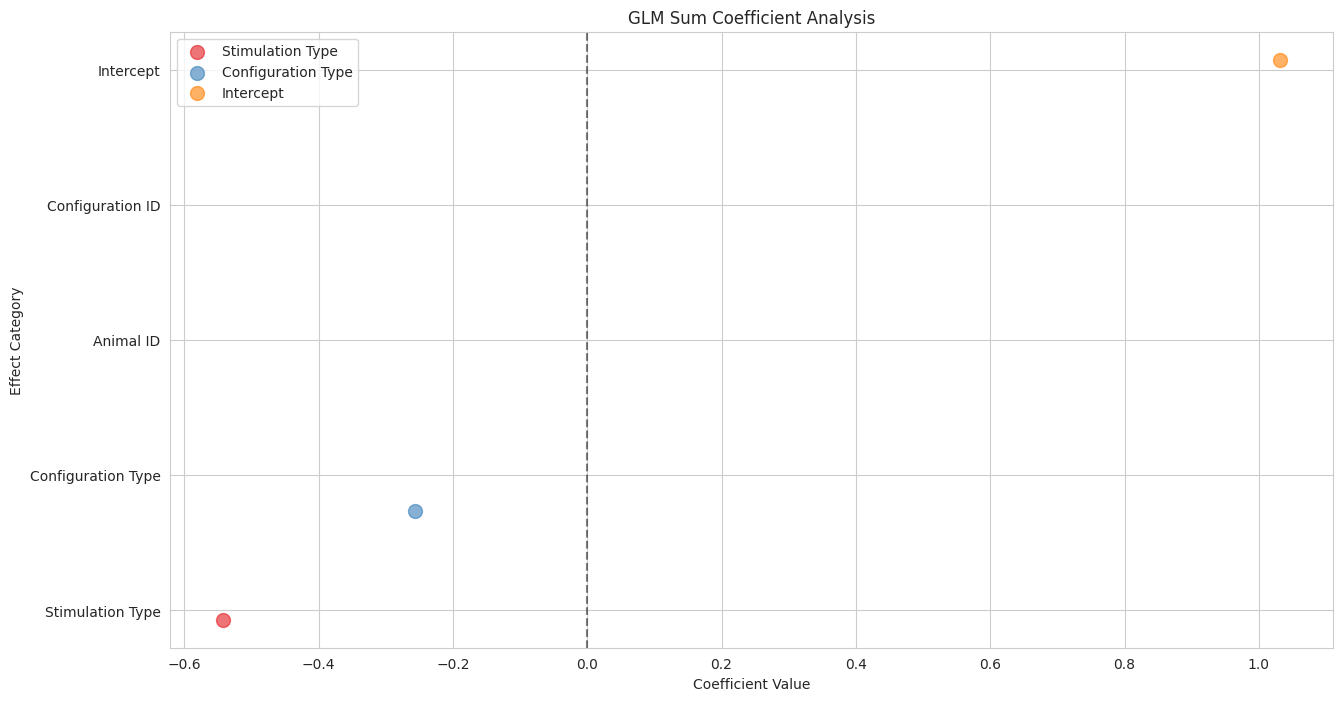

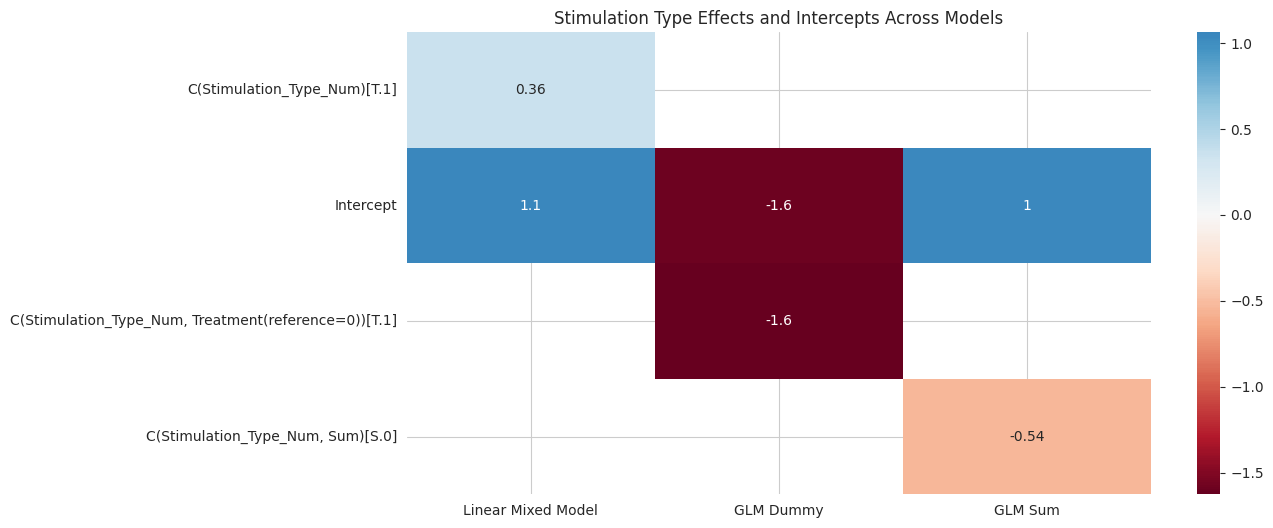

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import entropy
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import logit

def analyze_model_coefficients(model_result, model_name, df):
    """Analyze and visualize model coefficients with biological context"""
    # Extract coefficients
    coef_df = pd.DataFrame({
        'coefficient': model_result.params,
        'p_value': model_result.pvalues,
        'std_err': model_result.bse
    })

    # Add coefficient categories
    coef_df['category'] = 'Other'
    coef_df.loc[coef_df.index.str.contains('Stimulation_Type'), 'category'] = 'Stimulation Type'
    coef_df.loc[coef_df.index.str.contains('Configuration_Type'), 'category'] = 'Configuration Type'
    coef_df.loc[coef_df.index.str.contains('Animal_ID'), 'category'] = 'Animal ID'
    coef_df.loc[coef_df.index.str.contains('Configuration_ID'), 'category'] = 'Configuration ID'
    coef_df.loc[coef_df.index == 'Intercept', 'category'] = 'Intercept'

    # Create visualization
    plt.figure(figsize=(15, 8))

    # Updated color scheme including Intercept
    colors = ['#E41A1C',  # Red for Stimulation Type
              '#377EB8',  # Blue for Configuration Type
              '#4DAF4A',  # Green for Animal ID
              '#984EA3',  # Purple for Configuration ID
              '#FF7F00']  # Orange for Intercept

    # Plot coefficients by category
    categories = ['Stimulation Type', 'Configuration Type',
                 'Animal ID', 'Configuration ID', 'Intercept']

    for i, (cat, color) in enumerate(zip(categories, colors)):
        cat_coef = coef_df[coef_df['category'] == cat]
        if not cat_coef.empty:
            plt.scatter(cat_coef['coefficient'],
                       np.random.normal(i, 0.1, size=len(cat_coef)),
                       alpha=0.6, c=color, label=cat, s=100)

    plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
    plt.xlabel('Coefficient Value')
    plt.ylabel('Effect Category')
    plt.yticks(range(len(categories)), categories)
    plt.title(f'{model_name} Coefficient Analysis')
    plt.legend()

    return coef_df

def compare_models(lmm_result, glm_dummy_result, glm_sum_result, df):
    """Compare results across different modeling approaches"""
    models = {
        'Linear Mixed Model': lmm_result,
        'GLM Dummy': glm_dummy_result,
        'GLM Sum': glm_sum_result
    }

    # Compare stimulation type effects and intercepts
    effects_df = pd.DataFrame()

    for name, model in models.items():
        # Get stimulation type coefficients
        stim_coefs = model.params[model.params.index.str.contains('Stimulation_Type')]
        effects_df = pd.concat([effects_df, pd.DataFrame({name: stim_coefs})])

        # Add intercept
        intercept = model.params['Intercept']
        effects_df.loc['Intercept', name] = intercept

    # Visualization
    plt.figure(figsize=(12, 6))
    sns.heatmap(effects_df, cmap='RdBu', center=0, annot=True)
    plt.title('Stimulation Type Effects and Intercepts Across Models')
    plt.show()

    return effects_df

# Rest of the functions remain the same as in the previous version
def run_enhanced_analysis(df):
    """Run complete analysis pipeline"""
    # Prepare data
    df = df.copy()

    # Run models
    lmm_result = run_lmm(df)
    glm_dummy_result = run_glm_dummy(df)
    glm_sum_result = run_glm_sum(df)

    # Analyze each model
    lmm_coef = analyze_model_coefficients(lmm_result, 'Linear Mixed Model', df)
    glm_dummy_coef = analyze_model_coefficients(glm_dummy_result, 'GLM Dummy', df)
    glm_sum_coef = analyze_model_coefficients(glm_sum_result, 'GLM Sum', df)

    # Compare models
    model_comparison = compare_models(lmm_result, glm_dummy_result, glm_sum_result, df)

    return {
        'lmm_coef': lmm_coef,
        'glm_dummy_coef': glm_dummy_coef,
        'glm_sum_coef': glm_sum_coef,
        'model_comparison': model_comparison
    }

# Run the complete analysis
results = run_enhanced_analysis(long_df_cleaned)





In [ ]:

def analyze_configuration_effects(df, model_results):
    """Analyze the relationship between configuration properties and model coefficients"""
    # Calculate configuration properties with flattened column names
    config_properties = (df.groupby('Configuration ID')
                        .agg({
                            'Selectivity Score': ['mean', 'std', 'count'],
                            'Configuration Type': 'first'
                        })
                        .reset_index())

    # Flatten the multi-level columns
    config_properties.columns = [
        f"{col[0]}_{col[1]}" if col[1] else col[0]
        for col in config_properties.columns
    ]

    # Extract configuration coefficients from models
    config_coefs = model_results['glm_dummy_coef'][
        model_results['glm_dummy_coef'].index.str.contains('Configuration_ID')
    ].reset_index()
    config_coefs.columns = ['Configuration_ID', 'coefficient']

    # Clean Configuration_ID column to match with config_properties
    config_coefs['Configuration_ID'] = config_coefs['Configuration_ID'].str.extract(r'Configuration_ID_Num\[(\d+)\]')

    # Convert to numeric for merging
    config_coefs['Configuration_ID'] = pd.to_numeric(config_coefs['Configuration_ID'])

    # Join properties with coefficients
    analysis_df = pd.merge(
        config_properties,
        config_coefs,
        on='Configuration_ID',
        how='inner'
    )

    # Visualize relationships
    plt.figure(figsize=(15, 5))

    # Plot 1: Coefficient vs Mean Selectivity Score
    plt.subplot(131)
    plt.scatter(analysis_df['Selectivity Score_mean'],
               analysis_df['coefficient'],
               alpha=0.6)
    plt.xlabel('Mean Selectivity Score')
    plt.ylabel('Model Coefficient')

    # Plot 2: Coefficient vs Number of Trials
    plt.subplot(132)
    plt.scatter(analysis_df['Selectivity Score_count'],
               analysis_df['coefficient'],
               alpha=0.6)
    plt.xlabel('Number of Trials')
    plt.ylabel('Model Coefficient')

    # Plot 3: Box plot by Configuration Type
    plt.subplot(133)
    sns.boxplot(data=analysis_df,
                x='Configuration Type',
                y='coefficient')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    return analysis_df

# Extract and compare top 10 coefficients for GLM Sum and GLM Dummy
def compare_top_coefficients(glm_dummy_result, glm_sum_result):
    top_dummy = glm_dummy_result.params.abs().nlargest(10)
    top_sum = glm_sum_result.params.abs().nlargest(10)
    top_coefs_df = pd.DataFrame({"GLM Dummy": top_dummy, "GLM Sum": top_sum})

    plt.figure(figsize=(12, 6))
    sns.heatmap(top_coefs_df.T, cmap="mako", center=0, cbar_kws={'shrink': 0.8})
    plt.title("Top 10 Coefficients: GLM Dummy vs GLM Sum")
    plt.show()

# Check number of trials per Configuration ID corresponding to top coefficients
trials_per_configuration_id = long_df_reassigned["Configuration ID Num"].value_counts()
#print("Number of trials per Configuration ID:", trials_per_configuration_id)

# Find top Configuration IDs in GLM models
top_dummy_config_ids = [int(label.split("[")[1].strip("]")) for label in glm_dummy_result.params.abs().nlargest(10).index if "Configuration_ID_Num" in label]
top_sum_config_ids = [int(label.split("[")[1].strip("]")) for label in glm_sum_result.params.abs().nlargest(10).index if "Configuration_ID_Num" in label]

# Retrieve trial counts for top Configuration IDs
top_dummy_trials = trials_per_configuration_id.loc[top_dummy_config_ids]
top_sum_trials = trials_per_configuration_id.loc[top_sum_config_ids]

# Compare trial counts of top Configuration IDs
compare_trials_df = pd.DataFrame({"GLM Dummy": top_dummy_trials, "GLM Sum": top_sum_trials})
plt.figure(figsize=(12, 6))
sns.heatmap(compare_trials_df.T, cmap="mako", center=0, cbar_kws={'shrink': 0.8})
plt.title("Number of Trials for Top 10 Configurations in GLM Dummy vs GLM Sum")
plt.show()

In [ ]:
# Compute Variance Inflation Factor (VIF) for Predictors
# ----------------------------------------------------------
import patsy
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Rename columns for consistency in VIF computation
df_vif = long_df_cleaned.rename(columns={
    "Selectivity Score": "Selectivity_Score",
    "Stimulation Type Num": "Stimulation_Type_Num",
    "Configuration Type Num": "Configuration_Type_Num",
    "Animal ID Num": "Animal_ID_Num",
    "Configuration ID Num": "Configuration_ID_Num"
})

# Create design matrix using the same predictors as in the GLM:
# We use categorical encoding here so that each factor is expanded into dummy variables.
y, X = patsy.dmatrices("Selectivity_Score ~ C(Stimulation_Type_Num) + Configuration_Type_Num + C(Animal_ID_Num)",
                        df_vif, return_type='dataframe')

# Compute VIF for each column in the design matrix
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factors:")
print(vif_data)



Variance Inflation Factors:
                        feature         VIF
0                     Intercept  706.005094
1  C(Stimulation_Type_Num)[T.1]   58.243819
2         C(Animal_ID_Num)[T.2]    2.440152
3         C(Animal_ID_Num)[T.3]   11.222222
4         C(Animal_ID_Num)[T.4]   14.804005
5         C(Animal_ID_Num)[T.5]   64.928571
6         C(Animal_ID_Num)[T.6]   30.246032
7         C(Animal_ID_Num)[T.7]   21.924482
8         C(Animal_ID_Num)[T.8]   64.697527
9        Configuration_Type_Num   56.926383


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.othermod.betareg as br
import patsy

def run_beta_regression(df):
    """
    Runs beta regression on the selectivity scores using statsmodels BetaModel.
    Note: Beta regression requires values to be strictly between 0 and 1
    """
    # Prepare data - remove 0s and 1s and rename columns
    df_beta = df.copy()
    df_beta = df_beta.rename(columns={
        "Selectivity Score": "Selectivity_Score",
        "Stimulation Type Num": "Stimulation_Type_Num",
        "Configuration Type Num": "Configuration_Type_Num",
        "Animal ID Num": "Animal_ID_Num",
        "Configuration ID Num": "Configuration_ID_Num"
    })

    # Remove 0s and 1s and apply small adjustment
    epsilon = 1e-6
    df_beta['Selectivity_Score'] = df_beta['Selectivity_Score'].clip(epsilon, 1-epsilon)

    # Create design matrices using patsy
    formula = "Selectivity_Score ~ C(Stimulation_Type_Num) + Configuration_Type_Num + C(Animal_ID_Num)"
    y, X = patsy.dmatrices(formula, df_beta, return_type='dataframe')

    # Fit beta regression
    model = br.BetaModel(y, X)
    result = model.fit()
    print("\nBeta Regression Results:")
    print(result.summary())

    # Store predictions
    df_beta['beta_pred'] = result.fittedvalues

    return result, df_beta

def run_polynomial_regression(df, degree=2):
    """
    Runs polynomial regression to capture non-linear relationships
    """
    X = df[['Stimulation Type Num', 'Configuration Type Num']].values
    y = df['Selectivity Score'].values

    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Fit model
    model = LinearRegression()
    model.fit(X_poly, y)

    print(f"\nPolynomial Regression (degree {degree}) Results:")
    feature_names = poly.get_feature_names_out(['Stim', 'Config'])
    for name, coef in zip(feature_names, model.coef_):
        print(f"{name}: {coef:.4f}")

    return model, poly

def run_robust_regression(df):
    """
    Runs robust regression to handle potential outliers
    """
    df = df.rename(columns={
        "Selectivity Score": "Selectivity_Score",
        "Stimulation Type Num": "Stimulation_Type_Num",
        "Configuration Type Num": "Configuration_Type_Num",
        "Animal ID Num": "Animal_ID_Num",
        "Configuration ID Num": "Configuration_ID_Num"
    })

    model = smf.rlm("Selectivity_Score ~ C(Stimulation_Type_Num) + Configuration_Type_Num + C(Animal_ID_Num)",
                    data=df, M=sm.robust.norms.HuberT())
    result = model.fit()
    print("\nRobust Regression Results:")
    print(result.summary())
    return result

def compare_models_visualization(df, beta_result, poly_result, robust_result):
    """
    Creates visualization comparing predictions from different models
    """
    # First set of plots - Model predictions
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))

    # Original data distribution
    # sns.violinplot(data=df, x="Stimulation Type", y="Selectivity Score", ax=axes[0,0], inner="box")
    sns.boxplot(data=df, x='Stimulation Type', y='Selectivity Score',ax=axes[0,0], width=0.4, boxprops={'zorder': 2, 'alpha':0.8}, showcaps=True, whiskerprops={'linewidth': 2})
    axes[0,0].set_title('Original Data Distribution', fontsize=16, fontweight='bold')
    axes[0,0].set_ylim([-0.05, 1.1])
    axes[0,0].set_xlabel("Stimulation Type", fontsize=14)  # Increase x-axis label font size
    axes[0,0].tick_params(axis='x', labelsize=12)
    axes[0,0].set_ylabel("Selectivity Score", fontsize=14)  # Increase y-axis label font size


    # Beta regression predictions
    df_pred = df.copy()
    df_pred['Beta_Pred'] = beta_result[0].fittedvalues
    # sns.violinplot(data=df_pred, x="Stimulation Type", y="Beta_Pred", ax=axes[0,1], inner="box")
    sns.boxplot(data=df_pred, x='Stimulation Type', y='Beta_Pred', ax=axes[0,1], width=0.4, boxprops={'zorder': 2, 'alpha':0.8}, showcaps=True, whiskerprops={'linewidth': 2})
    axes[0,1].set_title('Beta Regression Predictions', fontsize=16, fontweight='bold')
    axes[0,1].set_ylim([-0.05, 1.1])
    axes[0,1].set_xlabel("Stimulation Type", fontsize=14)  # Increase x-axis label font size
    axes[0,1].tick_params(axis='x', labelsize=12)
    axes[0,1].set_ylabel("Selectivity Score", fontsize=14)  # Increase y-axis label font size

    # Polynomial regression predictions
    X_poly = poly_result[1].transform(df[['Stimulation Type Num', 'Configuration Type Num']].values)
    df_pred['Poly_Pred'] = poly_result[0].predict(X_poly)
    # sns.violinplot(data=df_pred, x="Stimulation Type", y="Poly_Pred", ax=axes[0,1], inner="box")
    sns.boxplot(data=df_pred, x='Stimulation Type', y='Poly_Pred', ax=axes[1,0],width=0.4, boxprops={'zorder': 2, 'alpha':0.8}, showcaps=True, whiskerprops={'linewidth': 2})
    axes[1,0].set_title('Polynomial Regression Predictions', fontsize=16, fontweight='bold')
    axes[1,0].set_ylim([-0.05, 1.1])
    axes[1,0].set_xlabel("Stimulation Type", fontsize=14)  # Increase x-axis label font size
    axes[1,0].tick_params(axis='x', labelsize=12)
    axes[1,0].set_ylabel("Selectivity Score", fontsize=14)  # Increase y-axis label font size

    # Robust regression predictions
    df_pred['Robust_Pred'] = robust_result.fittedvalues
    # sns.violinplot(data=df_pred, x="Stimulation Type", y="Robust_Pred", ax=axes[0,1], inner="box")
    sns.boxplot(data=df_pred, x='Stimulation Type', y='Robust_Pred', ax=axes[1,1],width=0.4, boxprops={'zorder': 2, 'alpha':0.8}, showcaps=True, whiskerprops={'linewidth': 2})
    axes[1,1].set_title('Robust Regression Predictions', fontsize=16, fontweight='bold')
    axes[1,1].set_xlabel("Stimulation Type", fontsize=14)  # Increase x-axis label font size
    axes[1,1].tick_params(axis='x', labelsize=12)
    axes[1,1].set_ylim([-0.05, 1.1])
    axes[1,1].set_ylabel("Selectivity Score", fontsize=14)  # Increase y-axis label font size

    plt.tight_layout()
    plt.savefig("NLMs_Pred.tiff", dpi=600, format="tiff")
    plt.show()

    # Second set of plots - Residuals
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Beta regression residuals
    sns.scatterplot(x=beta_result[0].fittedvalues,
                    y=beta_result[0].resid,
                    ax=axes[0])
    axes[0].axhline(y=0, color='r', linestyle='--')
    axes[0].set_title('Beta Regression Residuals')
    axes[0].set_xlabel('Fitted values')
    axes[0].set_ylabel('Residuals')

    # Polynomial regression residuals
    poly_residuals = df_pred['Selectivity Score'] - df_pred['Poly_Pred']
    sns.scatterplot(x=df_pred['Poly_Pred'], y=poly_residuals, ax=axes[1])
    axes[1].axhline(y=0, color='r', linestyle='--')
    axes[1].set_title('Polynomial Regression Residuals')
    axes[1].set_xlabel('Fitted values')
    axes[1].set_ylabel('Residuals')

    # Robust regression residuals
    sns.scatterplot(x=robust_result.fittedvalues,
                    y=robust_result.resid,
                    ax=axes[2])
    axes[2].axhline(y=0, color='r', linestyle='--')
    axes[2].set_title('Robust Regression Residuals')
    axes[2].set_xlabel('Fitted values')
    axes[2].set_ylabel('Residuals')

    plt.tight_layout()
    plt.show()

    # Additional diagnostic plots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # QQ plots for each model
    from statsmodels.graphics.gofplots import ProbPlot

    # Beta regression QQ plot
    probplot = ProbPlot(beta_result[0].resid)
    probplot.qqplot(ax=axes[0], line='45')
    axes[0].set_title('Beta Regression Q-Q Plot')

    # Polynomial regression QQ plot
    probplot = ProbPlot(poly_residuals)
    probplot.qqplot(ax=axes[1], line='45')
    axes[1].set_title('Polynomial Regression Q-Q Plot')

    # Robust regression QQ plot
    probplot = ProbPlot(robust_result.resid)
    probplot.qqplot(ax=axes[2], line='45')
    axes[2].set_title('Robust Regression Q-Q Plot')

    plt.tight_layout()
    plt.show()

def compute_effect_sizes(df):
    """
    Computes various effect size measures for the difference between TIS and Biphasic
    """
    tis_scores = df[df['Stimulation Type'] == 'TIS']['Selectivity Score']
    biphasic_scores = df[df['Stimulation Type'] == 'Biphasic']['Selectivity Score']

    # Cohen's d
    cohens_d = (tis_scores.mean() - biphasic_scores.mean()) / np.sqrt(
        ((tis_scores.count() - 1) * tis_scores.var() +
         (biphasic_scores.count() - 1) * biphasic_scores.var()) /
        (tis_scores.count() + biphasic_scores.count() - 2))

    # Cliff's Delta
    def cliffs_delta(x, y):
        nx = len(x)
        ny = len(y)
        delta = 0
        for i in x:
            for j in y:
                if i > j:
                    delta += 1
                elif i < j:
                    delta -= 1
        delta = delta / (nx * ny)
        return delta

    cliffs_d = cliffs_delta(tis_scores, biphasic_scores)

    # Add Mann-Whitney U test
    mw_stat, mw_p = stats.mannwhitneyu(tis_scores, biphasic_scores, alternative='two-sided')

    print("\nEffect Size Analysis:")
    print(f"Cohen's d: {cohens_d:.4f}")
    print(f"Cliff's Delta: {cliffs_d:.4f}")
    print(f"Mann-Whitney U p-value: {mw_p:.4f}")

    return {'cohens_d': cohens_d, 'cliffs_delta': cliffs_d, 'mw_p': mw_p}

# Main analysis function
def run_extended_analysis(df):
    print("Running extended analysis...")

    # Run all models
    beta_result = run_beta_regression(df)
    poly_result = run_polynomial_regression(df, degree=2)
    robust_result = run_robust_regression(df)

    # Compare models visually
    compare_models_visualization(df, beta_result, poly_result, robust_result)

    # Compute effect sizes
    effect_sizes = compute_effect_sizes(df)

    return {
        'beta_regression': beta_result,
        'polynomial_regression': poly_result,
        'robust_regression': robust_result,
        'effect_sizes': effect_sizes
    }

Running extended analysis...

Beta Regression Results:
                              BetaModel Results                               
Dep. Variable:      Selectivity_Score   Log-Likelihood:                 3041.9
Model:                      BetaModel   AIC:                            -6062.
Method:            Maximum Likelihood   BIC:                            -6010.
Date:                Sat, 15 Feb 2025                                         
Time:                        20:46:36                                         
No. Observations:                 840                                         
Df Residuals:                     829                                         
Df Model:                           9                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        4.4745 

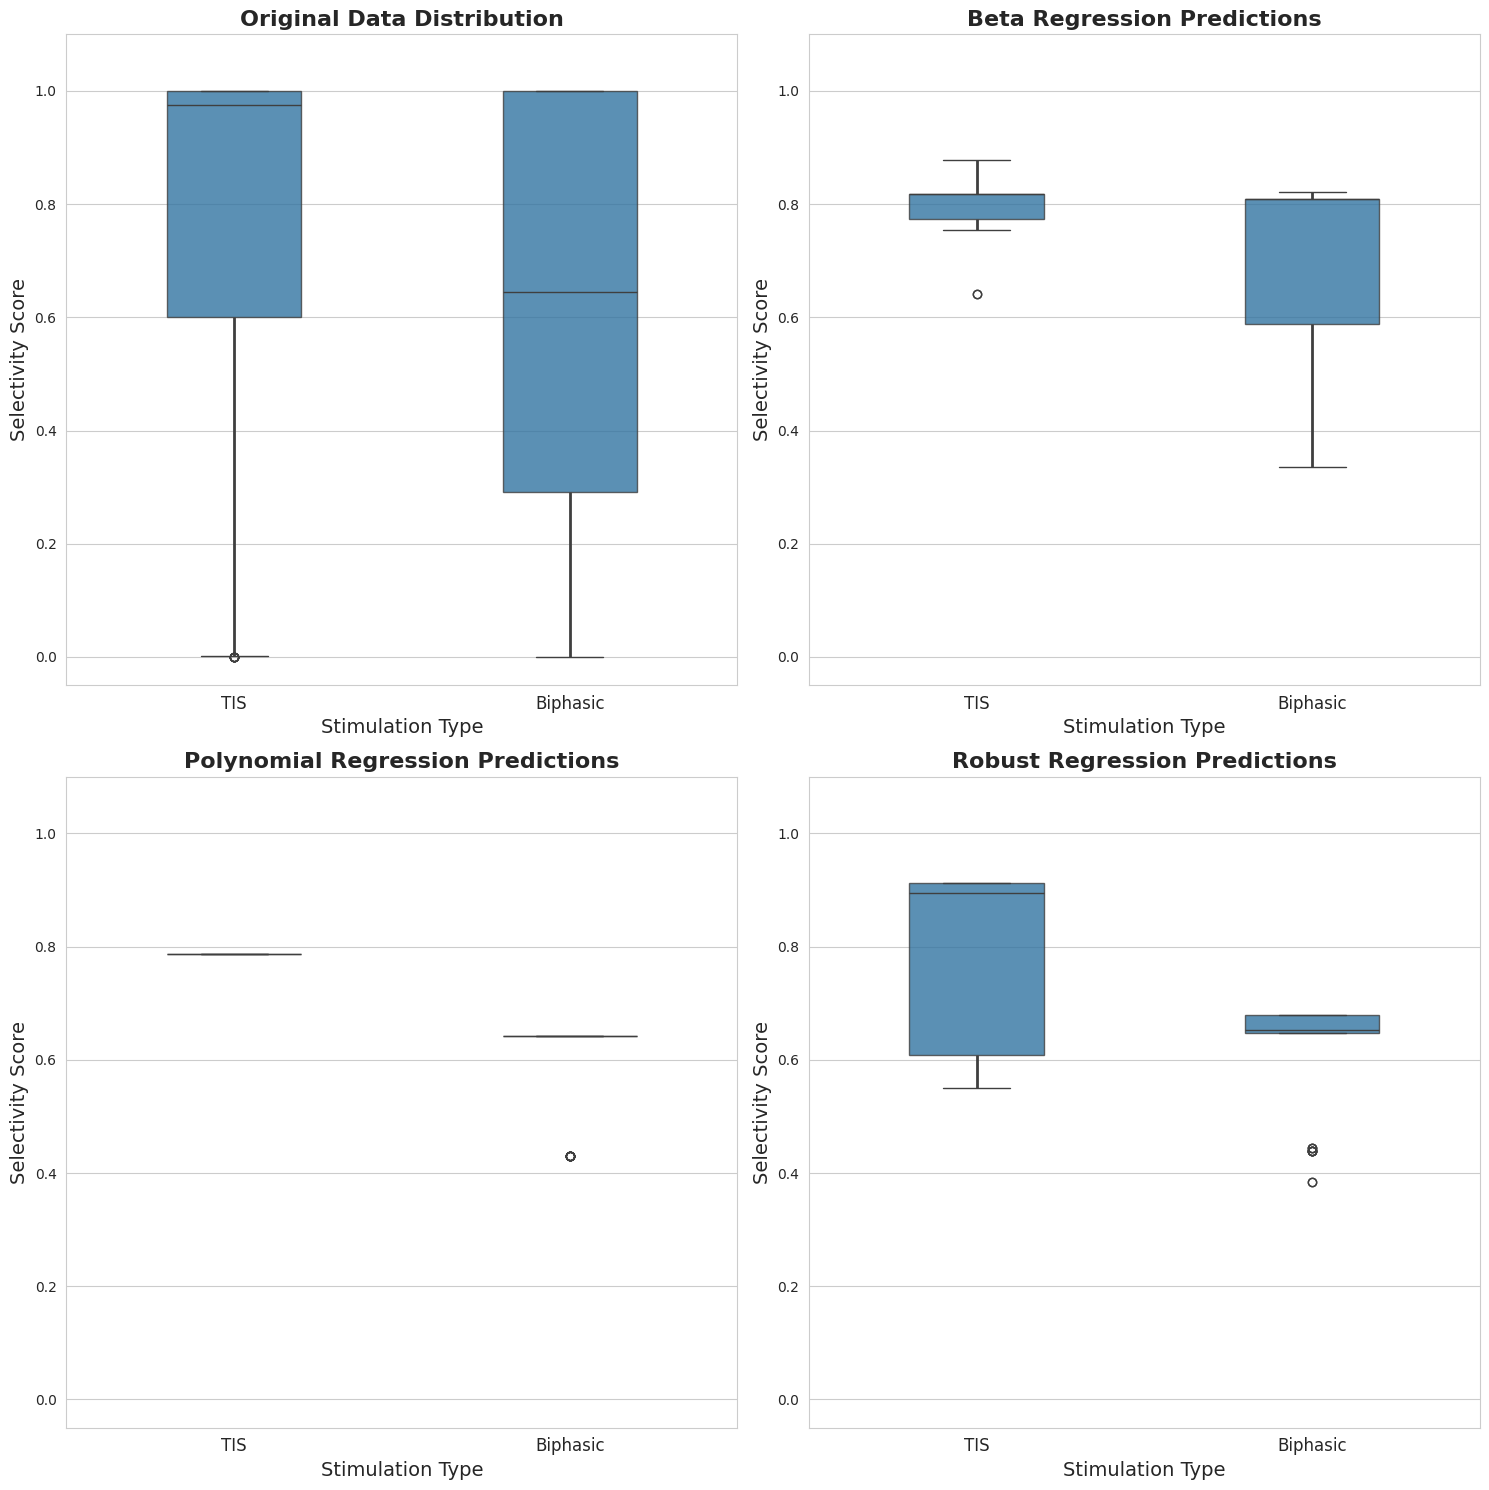

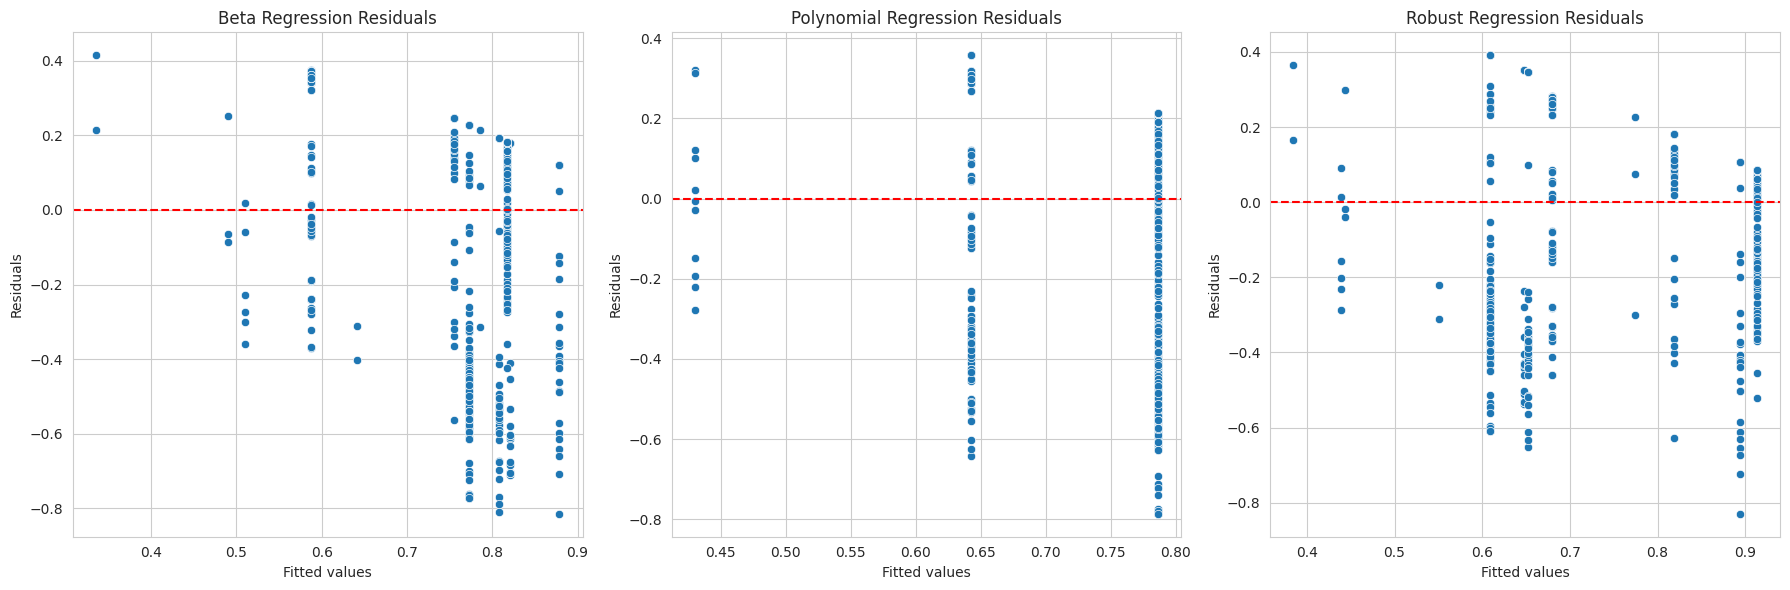

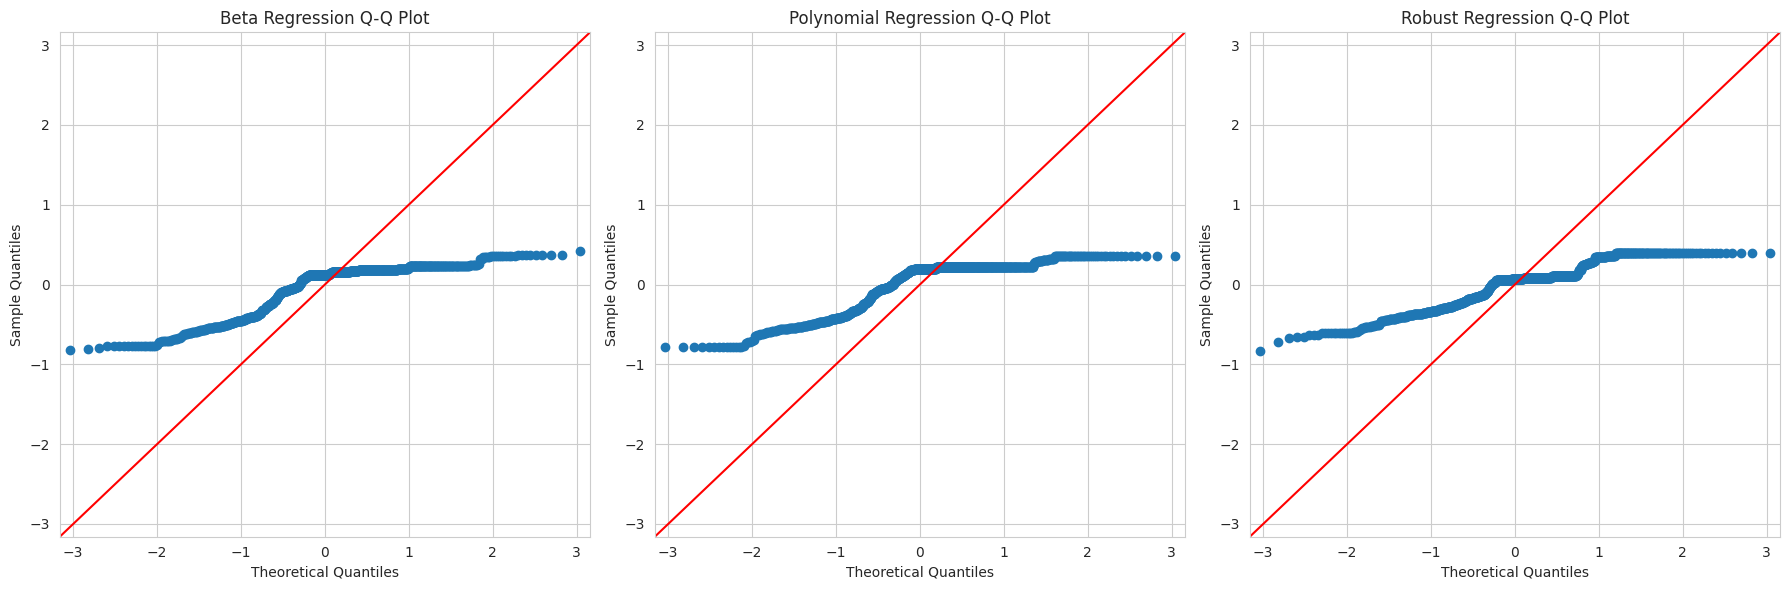


Effect Size Analysis:
Cohen's d: 0.5123
Cliff's Delta: 0.2699
Mann-Whitney U p-value: 0.0000


In [ ]:
# Run the extended analysis
results = run_extended_analysis(long_df_cleaned)


# from google.colab import files
# files.download("NLMs_Pred.tiff")

In [ ]:
import numpy as np

beta_0 = 4.4745
beta_1 = 2.7466

# For Biphasic
z_biphasic = beta_0 + beta_1 * 0
mu_biphasic = np.exp(z_biphasic) / (1 + np.exp(z_biphasic))

# For TIS
z_tis = beta_0 + beta_1 * 1
mu_tis = np.exp(z_tis) / (1 + np.exp(z_tis))

print(f"Expected Mean Selectivity Score (Biphasic): {mu_biphasic:.4f}")
print(f"Expected Mean Selectivity Score (TIS): {mu_tis:.4f}")

Expected Mean Selectivity Score (Biphasic): 0.9887
Expected Mean Selectivity Score (TIS): 0.9993


In [ ]:
import statsmodels.formula.api as smf

def run_interaction_regression(df):
    """
    Runs a regression with an interaction term to separate the effects of Stimulation Type and Configuration Type.
    """
    df_interact = df.copy()
    df_interact = df_interact.rename(columns={
        "Selectivity Score": "Selectivity_Score",
        "Stimulation Type Num": "Stimulation_Type_Num",
        "Configuration Type Num": "Configuration_Type_Num",
        "Animal ID Num": "Animal_ID_Num",
        "Configuration ID Num": "Configuration_ID_Num"
    })

    model = smf.ols("Selectivity_Score ~ C(Stimulation_Type_Num) * C(Configuration_Type_Num)", data=df_interact).fit()
    print(model.summary())

    return model

run_interaction_regression(long_df_cleaned)

                            OLS Regression Results                            
Dep. Variable:      Selectivity_Score   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     19.85
Date:                Sat, 15 Feb 2025   Prob (F-statistic):           3.78e-09
Time:                        17:46:35   Log-Likelihood:                -199.57
No. Observations:                 840   AIC:                             405.1
Df Residuals:                     837   BIC:                             419.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [ ]:
from pygam import LogisticGAM, s, f
import matplotlib.pyplot as plt
import numpy as np

def run_gam_logistic(df):
    """
    Fits a Generalized Additive Model (GAM) to check for non-linearity in Stimulation Type effects.
    """
    X = df[['Stimulation Type Num', 'Configuration Type Num']].values
    y = df['Selectivity Score'].values

    # Fit a GAM with Stimulation Type as a smooth term and Configuration Type as categorical
    gam = LogisticGAM(s(0, n_splines=5) + f(1)).fit(X, y)

    print("\nGAM Summary:")
    print(gam.summary())

    # Plot the smooth function of Stimulation Type
    XX = gam.generate_X_grid(term=0, n=100)  # Generate grid for Stimulation Type Num
    pdep, confi = gam.partial_dependence(term=0, X=XX, width=0.95)  # Calculate partial dependence

    plt.figure(figsize=(8, 6))
    plt.plot(XX[:, 0], pdep, label="Partial Dependence")  # Plot partial dependence for Stimulation Type Num
    plt.fill_between(XX[:, 0], confi[:, 0], confi[:, 1], alpha=0.2)  # Add confidence interval
    plt.scatter(X[:, 0], y_binary, alpha=0.3, label="Data")  # Scatter plot of the data
    plt.xlabel("Stimulation Type Num (0=Biphasic, 1=TIS)")
    plt.ylabel("Selectivity Score")
    plt.title("GAM Partial Dependence for Stimulation Type Num")
    plt.legend()
    plt.show()


    return gam

def run_gam_linear(df):
    """
    Runs a Generalized Additive Model (GAM) to capture non-linear relationships.
    Uses a smoothing spline on Stimulation Type and treats Configuration Type as a factor.
    """
    X = df[['Stimulation Type Num', 'Configuration Type Num']].values
    y = df['Selectivity Score'].values
    # Here, s(0) applies a smooth spline to the first predictor and f(1) treats the second as a factor.
    gam = LinearGAM(s(0) + f(1)).fit(X, y)
    print("\nGAM Summary:")
    print(gam.summary())
    return gam


In [ ]:
run_gam_logistic(long_df_cleaned)


GAM Summary:
LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.8939
Link Function:                        LogitLink Log Likelihood:                                       -inf
Number of Samples:                          840 AIC:                                                   inf
                                                AICc:                                                  inf
                                                UBRE:                                               2.5752
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.0375
Feature Function       

/usr/local/lib/python3.11/dist-packages/pygam/pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
/usr/local/lib/python3.11/dist-packages/pygam/pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll
<ipython-input-71-074750d8153d>:16: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


ValueError: X data is out of domain for categorical feature 1. Expected data on [2.0, 4.0], but found data on [0.0, 0.0]

Running extended analysis...

Beta Regression Results:
                              BetaModel Results                               
Dep. Variable:      Selectivity_Score   Log-Likelihood:                 3041.9
Model:                      BetaModel   AIC:                            -6062.
Method:            Maximum Likelihood   BIC:                            -6010.
Date:                Sat, 15 Feb 2025                                         
Time:                        17:41:04                                         
No. Observations:                 840                                         
Df Residuals:                     829                                         
Df Model:                           9                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4.4745      1.167      3.

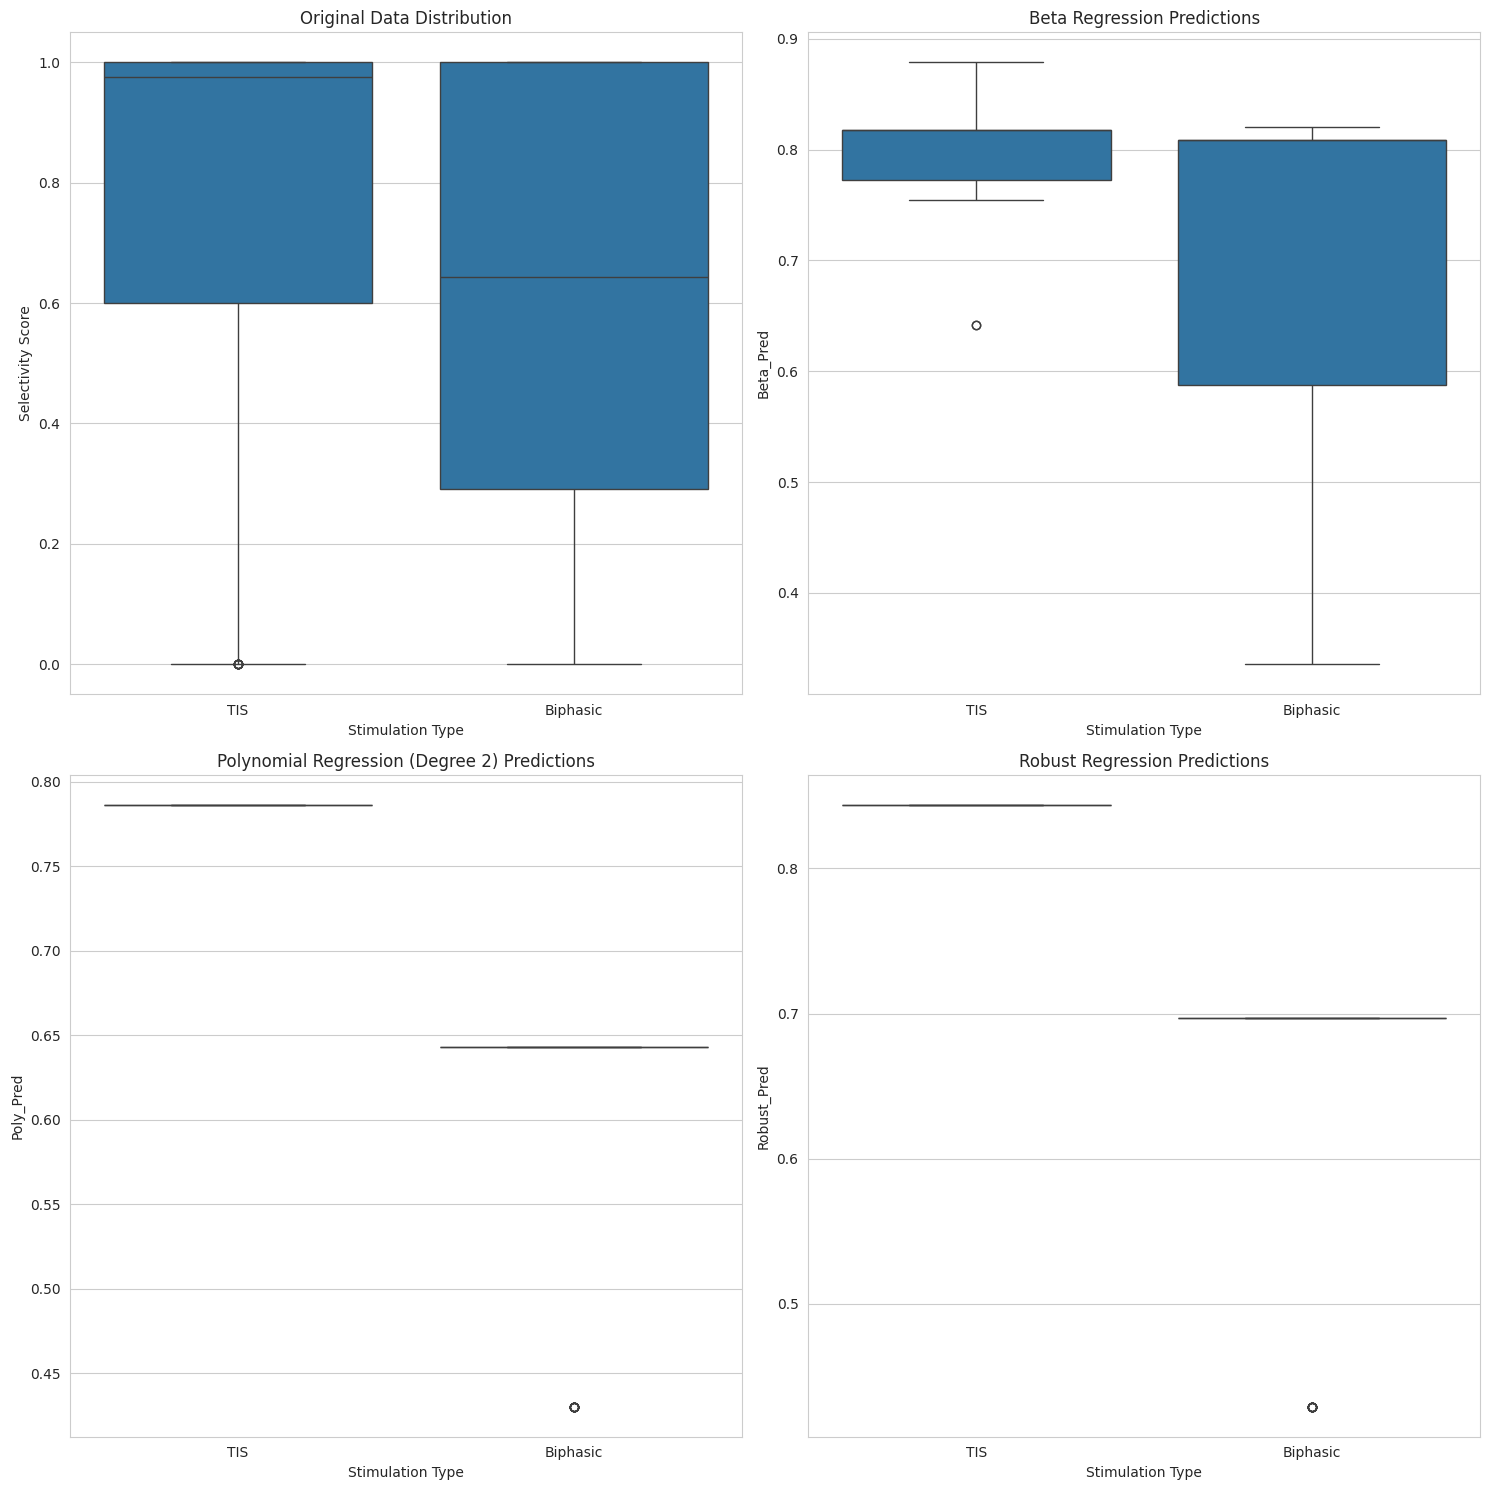

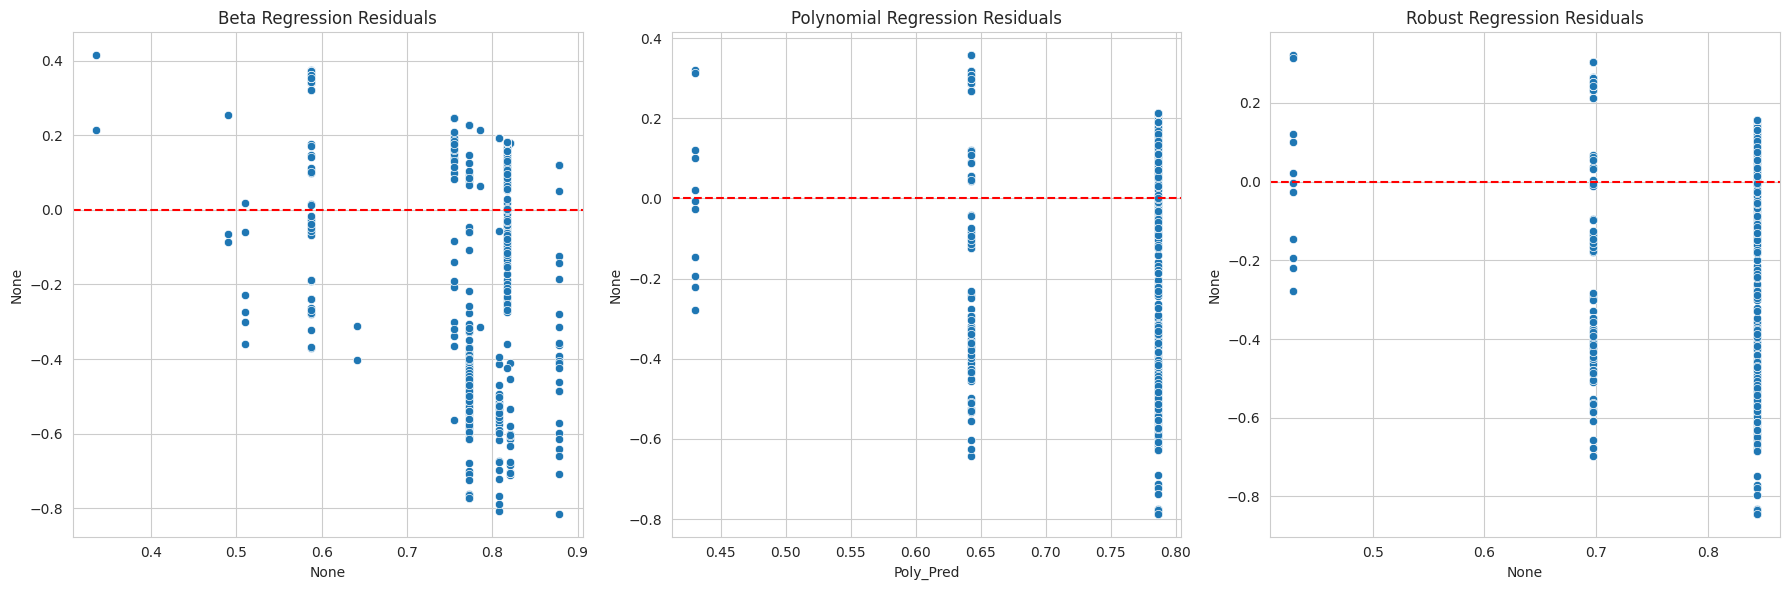


Effect Size Analysis:
Cohen's d: 0.5123
Cliff's Delta: 0.2699
Mann-Whitney U p-value: 0.0000

Polynomial Regression (degree 3) Results:
1: 0.0000
Stim: 0.0026
Config: -0.0029
Stim^2: 0.0026
Stim Config: 0.0102
Config^2: -0.0092
Stim^3: 0.0026
Stim^2 Config: 0.0102
Stim Config^2: 0.0408
Config^3: -0.0086

GAM Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      2.9716
Link Function:                     IdentityLink Log Likelihood:                                 -3218.9883
Number of Samples:                          840 AIC:                                             6445.9198
                                                AICc:                                            6445.9671
                                      

<ipython-input-54-56986f1bea5e>:99: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


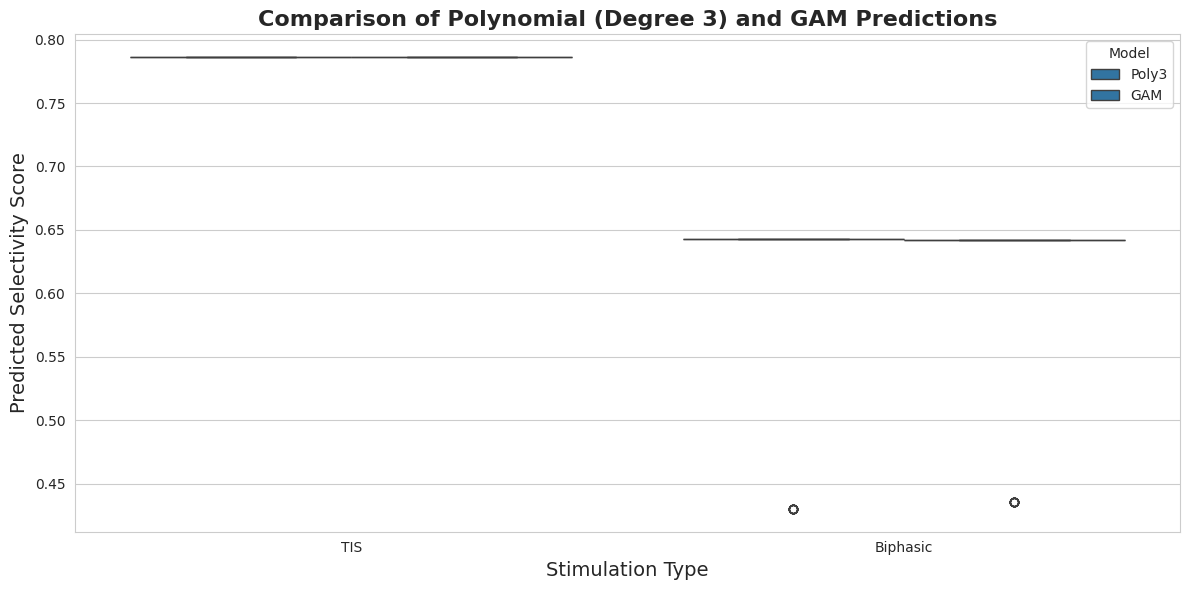

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import mannwhitneyu, beta
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.gridspec as gridspec
import patsy
import statsmodels.othermod.betareg as br

# For GAM; make sure to install pyGAM via: pip install pygam
from pygam import LinearGAM, s, f

# Set Seaborn style and color palette for accessibility (blue for TIS, orange for Biphasic)
sns.set_style("whitegrid")
sns.set_palette(["#1f77b4", "#d62728"])


# ----- Existing Model Functions -----
def run_beta_regression(df):
    """
    Runs beta regression on the selectivity scores using statsmodels BetaModel.
    Note: Beta regression requires values to be strictly between 0 and 1.
    """
    df_beta = df.copy()
    df_beta = df_beta.rename(columns={
        "Selectivity Score": "Selectivity_Score",
        "Stimulation Type Num": "Stimulation_Type_Num",
        "Configuration Type Num": "Configuration_Type_Num",
        "Animal ID Num": "Animal_ID_Num",
        "Configuration ID Num": "Configuration_ID_Num"
    })
    epsilon = 1e-6
    df_beta['Selectivity_Score'] = df_beta['Selectivity_Score'].clip(epsilon, 1 - epsilon)
    formula = "Selectivity_Score ~ Stimulation_Type_Num + Configuration_Type_Num + C(Animal_ID_Num)"
    y, X = patsy.dmatrices(formula, df_beta, return_type='dataframe')
    model = br.BetaModel(y, X)
    result = model.fit()
    print("\nBeta Regression Results:")
    print(result.summary())
    df_beta['beta_pred'] = result.fittedvalues
    return result, df_beta

def run_polynomial_regression(df, degree=2):
    """
    Runs polynomial regression (degree can be specified) to capture non-linear relationships.
    """
    X = df[['Stimulation Type Num', 'Configuration Type Num']].values
    y = df['Selectivity Score'].values
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    print(f"\nPolynomial Regression (degree {degree}) Results:")
    feature_names = poly.get_feature_names_out(['Stim', 'Config'])
    for name, coef in zip(feature_names, model.coef_):
        print(f"{name}: {coef:.4f}")
    return model, poly

def run_robust_regression(df):
    """
    Runs robust regression to handle potential outliers.
    """
    df_r = df.rename(columns={
        "Selectivity Score": "Selectivity_Score",
        "Stimulation Type Num": "Stimulation_Type_Num",
        "Configuration Type Num": "Configuration_Type_Num"
    })
    model = smf.rlm("Selectivity_Score ~ Stimulation_Type_Num + Configuration_Type_Num",
                    data=df_r, M=sm.robust.norms.HuberT())
    result = model.fit()
    print("\nRobust Regression Results:")
    print(result.summary())
    return result

# ----- Additional Model Functions -----
def run_polynomial_regression_deg3(df):
    """
    Runs polynomial regression with degree 3.
    """
    return run_polynomial_regression(df, degree=3)

def run_gam(df):
    """
    Runs a Generalized Additive Model (GAM) to capture non-linear relationships.
    Uses a smoothing spline on Stimulation Type and treats Configuration Type as a factor.
    """
    X = df[['Stimulation Type Num', 'Configuration Type Num']].values
    y = df['Selectivity Score'].values
    # Here, s(0) applies a smooth spline to the first predictor and f(1) treats the second as a factor.
    gam = LinearGAM(s(0) + f(1)).fit(X, y)
    print("\nGAM Summary:")
    print(gam.summary())
    return gam

# ----- Visualization Functions -----
def compare_models_visualization(df, beta_result, poly_result, robust_result):
    """
    Creates visualizations comparing predictions and residuals from beta, polynomial, and robust regressions.
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    # Original Data Distribution
    sns.boxplot(data=df, x='Stimulation Type', y='Selectivity Score', ax=axes[0,0])
    axes[0,0].set_title('Original Data Distribution')

    # Beta Regression Predictions
    df_pred = df.copy()
    df_pred['Beta_Pred'] = beta_result[0].fittedvalues
    sns.boxplot(data=df_pred, x='Stimulation Type', y='Beta_Pred', ax=axes[0,1])
    axes[0,1].set_title('Beta Regression Predictions')

    # Polynomial Regression Predictions (degree 2)
    X_poly = poly_result[1].transform(df[['Stimulation Type Num', 'Configuration Type Num']].values)
    df_pred['Poly_Pred'] = poly_result[0].predict(X_poly)
    sns.boxplot(data=df_pred, x='Stimulation Type', y='Poly_Pred', ax=axes[1,0])
    axes[1,0].set_title('Polynomial Regression (Degree 2) Predictions')

    # Robust Regression Predictions
    df_pred['Robust_Pred'] = robust_result.fittedvalues
    sns.boxplot(data=df_pred, x='Stimulation Type', y='Robust_Pred', ax=axes[1,1])
    axes[1,1].set_title('Robust Regression Predictions')

    plt.tight_layout()
    plt.show()

    # Residual Plots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    sns.scatterplot(x=beta_result[0].fittedvalues, y=beta_result[0].resid, ax=axes[0])
    axes[0].axhline(0, color='r', linestyle='--')
    axes[0].set_title('Beta Regression Residuals')

    poly_resid = df_pred['Selectivity Score'] - df_pred['Poly_Pred']
    sns.scatterplot(x=df_pred['Poly_Pred'], y=poly_resid, ax=axes[1])
    axes[1].axhline(0, color='r', linestyle='--')
    axes[1].set_title('Polynomial Regression Residuals')

    sns.scatterplot(x=robust_result.fittedvalues, y=robust_result.resid, ax=axes[2])
    axes[2].axhline(0, color='r', linestyle='--')
    axes[2].set_title('Robust Regression Residuals')

    plt.tight_layout()
    plt.show()

def compare_additional_models(df):
    """
    Runs and compares additional non-linear models (Polynomial Regression Degree 3 and GAM)
    and visualizes their predictions.
    """
    poly3_model, poly3_transformer = run_polynomial_regression_deg3(df)
    gam_model = run_gam(df)

    # Predict using both models
    X = df[['Stimulation Type Num', 'Configuration Type Num']].values
    poly3_preds = poly3_model.predict(poly3_transformer.transform(X))
    gam_preds = gam_model.predict(X)

    # Create a DataFrame with predictions for both models
    df_compare = df.copy()
    df_compare['Poly3_Pred'] = poly3_preds
    df_compare['GAM_Pred'] = gam_preds

    # Melt the DataFrame to long format for boxplot comparison
    df_melt = df_compare.melt(id_vars=['Stimulation Type'],
                              value_vars=['Poly3_Pred', 'GAM_Pred'],
                              var_name='Model',
                              value_name='Predicted_Selectivity')

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_melt, x='Stimulation Type', y='Predicted_Selectivity', hue='Model')
    plt.title("Comparison of Polynomial (Degree 3) and GAM Predictions", fontsize=16, fontweight='bold')
    plt.xlabel("Stimulation Type", fontsize=14)
    plt.ylabel("Predicted Selectivity Score", fontsize=14)
    plt.legend(title='Model', labels=["Poly3", "GAM"])
    plt.tight_layout()
    plt.show()

    return poly3_model, gam_model

# ----- Effect Size Function -----
def compute_effect_sizes(df):
    """
    Computes effect sizes (Cohen's d, Cliff's Delta) and Mann-Whitney U p-value between TIS and Biphasic.
    """
    tis_scores = df[df['Stimulation Type'] == 'TIS']['Selectivity Score']
    biphasic_scores = df[df['Stimulation Type'] == 'Biphasic']['Selectivity Score']
    cohens_d = (tis_scores.mean() - biphasic_scores.mean()) / np.sqrt(
        ((tis_scores.count() - 1) * tis_scores.var() +
         (biphasic_scores.count() - 1) * biphasic_scores.var()) /
        (tis_scores.count() + biphasic_scores.count() - 2))
    def cliffs_delta(x, y):
        nx, ny = len(x), len(y)
        delta = 0
        for i in x:
            for j in y:
                if i > j:
                    delta += 1
                elif i < j:
                    delta -= 1
        return delta / (nx * ny)
    cliffs_d = cliffs_delta(tis_scores, biphasic_scores)
    mw_stat, mw_p = stats.mannwhitneyu(tis_scores, biphasic_scores, alternative='two-sided')
    print("\nEffect Size Analysis:")
    print(f"Cohen's d: {cohens_d:.4f}")
    print(f"Cliff's Delta: {cliffs_d:.4f}")
    print(f"Mann-Whitney U p-value: {mw_p:.4f}")
    return {'cohens_d': cohens_d, 'cliffs_delta': cliffs_d, 'mw_p': mw_p}

# ----- Main Extended Analysis Function -----
def run_extended_analysis(df):
    """
    Runs the full suite of models (Beta Regression, Polynomial (deg 2 & 3), Robust Regression, GAM),
    visualizes predictions and residuals, and computes effect sizes.
    """
    print("Running extended analysis...")

    # Run core models
    beta_result = run_beta_regression(df)
    poly_result = run_polynomial_regression(df, degree=2)
    robust_result = run_robust_regression(df)

    # Visualize core model comparisons
    compare_models_visualization(df, beta_result, poly_result, robust_result)

    # Compute effect sizes from the original data
    effect_sizes = compute_effect_sizes(df)

    # Run additional non-linear models: Polynomial (deg 3) and GAM, and compare their predictions
    poly3_model, gam_model = compare_additional_models(df)

    return {
        'beta_regression': beta_result,
        'polynomial_regression_deg2': poly_result,
        'robust_regression': robust_result,
        'polynomial_regression_deg3': poly3_model,
        'gam_model': gam_model,
        'effect_sizes': effect_sizes
    }

# ----- Running the Comparison -----
# To run the full comparison, simply call run_extended_analysis on your DataFrame:
results = run_extended_analysis(long_df_cleaned)


/usr/local/lib/python3.11/dist-packages/pygam/pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
/usr/local/lib/python3.11/dist-packages/pygam/pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll


LogisticGAM Mean Squared Error: 0.156593


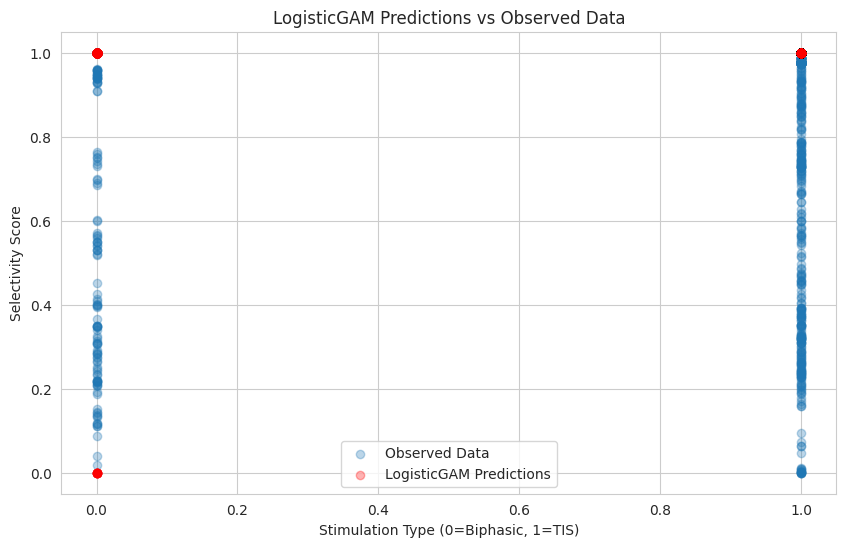

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pygam import LogisticGAM, s, f
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Assuming 'long_df_reassigned' is your DataFrame
df_model = long_df_cleaned.copy()

# Map 'Stimulation Type' to numerical values
df_model['Stimulation_Type_Num'] = df_model['Stimulation Type'].map({'Biphasic': 0, 'TIS': 1})

# Define predictors and response
X = df_model[['Stimulation_Type_Num', 'Configuration Type Num']]
y = df_model['Selectivity Score']

# Initialize and fit the LogisticGAM
gam = LogisticGAM(s(0) + s(1)).fit(X, y)

# Predict using the fitted model
y_pred = gam.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
print(f"LogisticGAM Mean Squared Error: {mse:.6f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X['Stimulation_Type_Num'], y, alpha=0.3, label="Observed Data")
plt.scatter(X['Stimulation_Type_Num'], y_pred, color='red', alpha=0.3, label="LogisticGAM Predictions")
plt.title("LogisticGAM Predictions vs Observed Data")
plt.xlabel("Stimulation Type (0=Biphasic, 1=TIS)")
plt.ylabel("Selectivity Score")
plt.legend()
plt.show()


Dropdown(description='Select:', options=(1, 2, 3, 4), value=1)

GridBox(children=(Button(layout=Layout(height='50px', width='50px'), style=ButtonStyle(button_color='lightgray…

Button(button_style='success', description='Save Matrix', style=ButtonStyle())

Saved matrix:
 [[ 1  0 -1  0  0  1  0 -1]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


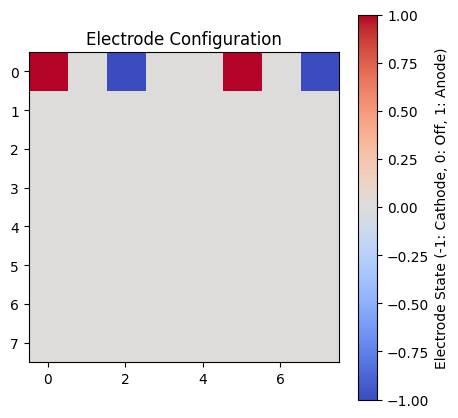

In [ ]:
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display

# Grid size
GRID_SIZE = 8

# Initialize the 8x8 electrode matrix
matrix = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)

# Button styles
colors = {1: "red", -1: "blue", 0: "lightgray"}
labels = {1: "A", -1: "C", 0: ""}

# Dropdown for number of electrodes to select
num_electrodes = widgets.Dropdown(
    options=[1, 2, 3, 4],
    value=1,
    description='Select:',
)

def update_button_color(btn, value):
    """Update button appearance based on selection."""
    btn.style.button_color = colors[value]
    btn.description = labels[value]

def on_button_click(btn):
    """Handle button click events."""
    x, y = btn.x, btn.y
    if matrix[x, y] == 0:
        matrix[x, y] = 1  # Anode (1)
    elif matrix[x, y] == 1:
        matrix[x, y] = -1  # Cathode (-1)
    else:
        matrix[x, y] = 0  # OFF (0)
    update_button_color(btn, matrix[x, y])

def update_plot():
    """Display the electrode matrix."""
    plt.figure(figsize=(5, 5))
    plt.imshow(matrix, cmap='coolwarm', vmin=-1, vmax=1)
    plt.colorbar(label='Electrode State (-1: Cathode, 0: Off, 1: Anode)')
    plt.title("Electrode Configuration")
    plt.show()

def save_matrix():
    """Save and print the matrix."""
    np.savetxt("electrode_matrix.txt", matrix, fmt='%d')
    print("Saved matrix:\n", matrix)
    update_plot()

# Create a grid of buttons
buttons = []
grid = widgets.GridBox(layout=widgets.Layout(grid_template_columns=' '.join(['50px'] * GRID_SIZE),
                                              grid_gap='5px'))  # grid_gap is now a separate argument
for i in range(GRID_SIZE):
    row = []
    for j in range(GRID_SIZE):
        btn = widgets.Button(layout=widgets.Layout(width='50px', height='50px'))
        btn.x, btn.y = i, j
        btn.on_click(on_button_click)
        update_button_color(btn, 0)
        row.append(btn)
    buttons.extend(row)
grid.children = tuple(buttons)

# Save button
save_btn = widgets.Button(description="Save Matrix", button_style='success')
save_btn.on_click(lambda x: save_matrix())

# Display interface
display(num_electrodes, grid, save_btn)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Replace 'path/to/your/file.csv' with the actual path to your file in Google Drive
file_path = '/content/drive/My Drive/path/to/your/file.csv'
df = pd.read_csv(file_path)
display(df.head())